#### Project Introduction

Credit risk assessment is a fundamental task for financial institutions. Traditionally, it relies on expert judgment or scorecard systems to evaluate a client's ability to repay. This project leverages machine learning to **automatically classify credit applicants into three distinct risk categories:**

- **Good Client**
- **Low Risk**
- **High Risk**

The model is trained on historical financial and behavioral data to predict the client's risk profile.


**Important:** This is not a binary loan approval model (e.g., Approved/Rejected).

Instead, it aims to provide **a more nuanced, multi-class risk segmentation**, enabling better risk-based decision-making rather than simple application acceptance or denial.

This three-level classification can support more informed and personalized credit/loan strategies by:

This classification can help financial institutions make more informed decisions in areas such as:

- Setting appropriate credit limits
- Adjusting interest rates based on risk
- Enabling early identification of high-risk profiles

By focusing on **risk segmentation**, the model provides financial institutions with a **deeper understanding of client risk**, leading to smarter and **more ethical lending policies.**

By focusing on risk segmentation rather than binary approval, the model provides a more nuanced view of customer risk, enabling smarter and fairer credit policy strategies.

A core focus of the project is to ensure the model remains **fair, transparent, and free of unjust bias**. To achieve this, the model will be:

- Evaluated for fairness across sensitive attributes
- Interpretable using **explainable AI (XAI)** techniques such as SHAP
- Designed to comply with ethical standards in AI-driven credit systems


By automating the credit risk classification process with AI, the project seeks/goal to:
- Improve accuracy in credit risk classification
- Enhance transparency and interpretability of AI models
- Promote fair, responsible, and data-driven lending decisions


In [1]:
# To display multiple outputs from the same cell use the following codes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import packages (libraries)

import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import graphviz

In [2]:
app_df = pd.read_csv('application_record.csv')
display(app_df.head())
print(f"Shape of df_application: {app_df.shape}")


credit_df = pd.read_csv('credit_record.csv')
display(credit_df.head())
print(f"Shape of df_credit: {credit_df.shape}")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Shape of df_application: (438557, 18)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Shape of df_credit: (1048575, 3)



- `application_record.csv`: contains information about clients who applied for credit. This includes features like gender, income, family size, and more. It has **438,557 rows and 18 columns**.
- `credit_record.csv`: contains the monthly credit behavior of the clients, such as status of payments over time. This dataset has **1,048,575 rows and 3 columns**.



## df_application Exploration
### Data Types and Missing Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG

<Figure size 800x600 with 0 Axes>

(array([ 1074.,  3267.,  8500., 11999., 12479., 15137., 14766., 15816.,
        15166., 16669., 16025., 15353., 15903., 16425., 17275., 19148.,
        20989., 20613., 22240., 20650., 19782., 19367., 19961., 19108.,
        19719., 20317.,  8927.,  6609.,  5019.,   254.]),
 array([-25201. , -24610.6, -24020.2, -23429.8, -22839.4, -22249. ,
        -21658.6, -21068.2, -20477.8, -19887.4, -19297. , -18706.6,
        -18116.2, -17525.8, -16935.4, -16345. , -15754.6, -15164.2,
        -14573.8, -13983.4, -13393. , -12802.6, -12212.2, -11621.8,
        -11031.4, -10441. ,  -9850.6,  -9260.2,  -8669.8,  -8079.4,
         -7489. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribution of DAYS_BIRTH')

Text(0.5, 0, 'DAYS_BIRTH')

Text(0, 0.5, 'Frequency')

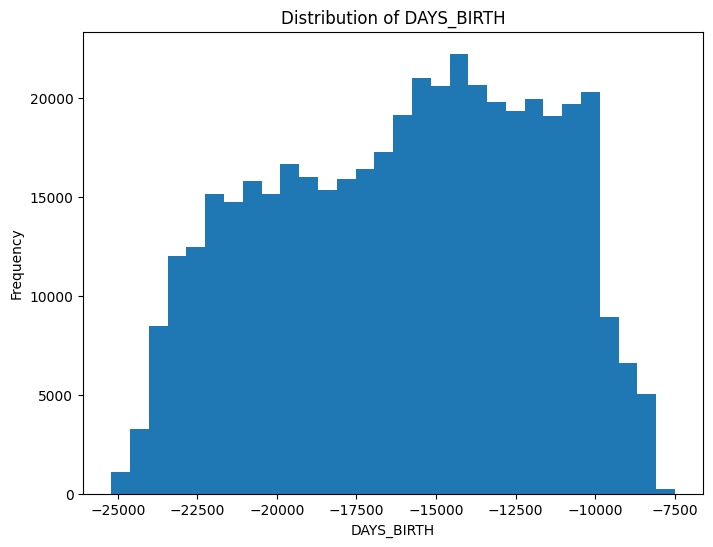

<Figure size 800x600 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1e35d8a8c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1e35d8f7d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e35d8dc1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e35f939790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e35f939a90>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of DAYS_BIRTH')

Text(0, 0.5, 'DAYS_BIRTH')

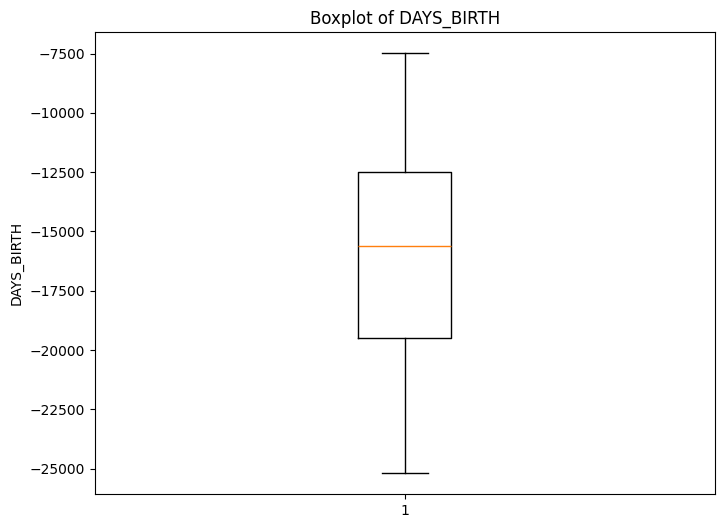


#### AMT_INCOME_TOTAL
count    4.385570e+05
mean     1.875243e+05
std      1.100869e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.607805e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


<Figure size 800x600 with 0 Axes>

(array([3.60094e+05, 7.25010e+04, 4.59100e+03, 9.02000e+02, 2.37000e+02,
        1.01000e+02, 2.90000e+01, 1.60000e+01, 3.90000e+01, 7.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+00, 6.00000e+00,
        0.00000e+00, 6.00000e+00, 6.00000e+00, 0.00000e+00, 1.00000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.00000e+00]),
 array([  26100.,  250230.,  474360.,  698490.,  922620., 1146750.,
        1370880., 1595010., 1819140., 2043270., 2267400., 2491530.,
        2715660., 2939790., 3163920., 3388050., 3612180., 3836310.,
        4060440., 4284570., 4508700., 4732830., 4956960., 5181090.,
        5405220., 5629350., 5853480., 6077610., 6301740., 6525870.,
        6750000.]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribution of AMT_INCOME_TOTAL')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

Text(0, 0.5, 'Frequency')

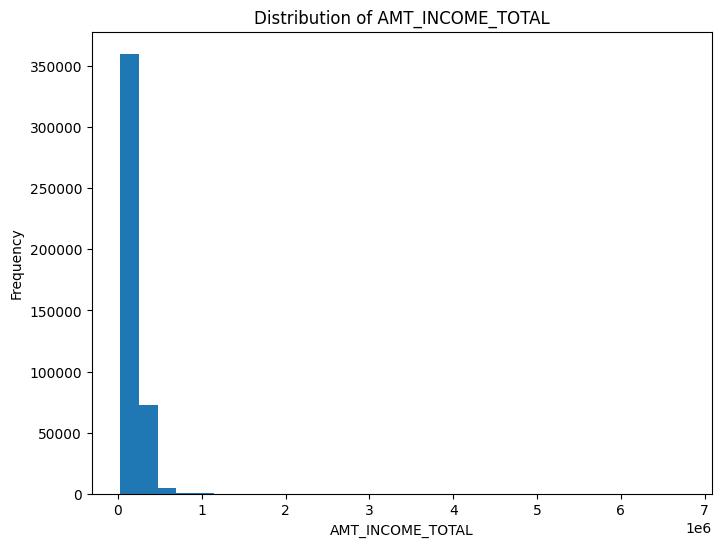

<Figure size 800x600 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1e360032e70>,
 'caps': [<matplotlib.lines.Line2D at 0x1e360033440>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e360032ba0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e360033a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e360033ce0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of AMT_INCOME_TOTAL')

Text(0, 0.5, 'AMT_INCOME_TOTAL')

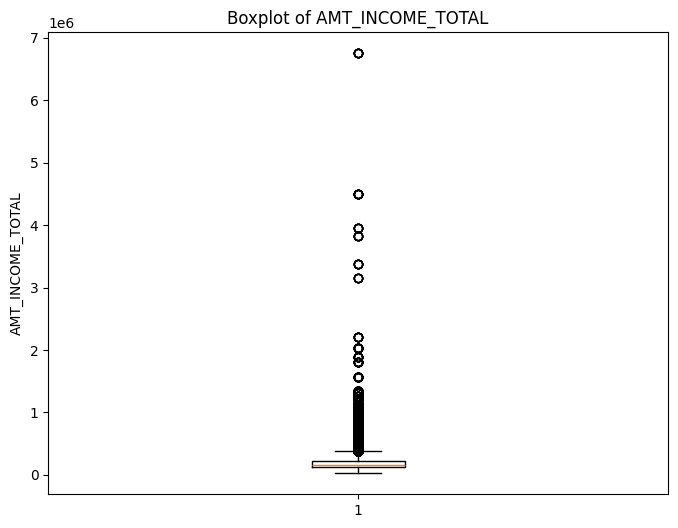


#### CNT_FAM_MEMBERS
count    438557.000000
mean          2.194465
std           0.897207
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


<Figure size 800x600 with 0 Axes>

(array([8.44920e+04, 2.33891e+05, 0.00000e+00, 7.71280e+04, 3.73560e+04,
        0.00000e+00, 5.08100e+03, 4.59000e+02, 0.00000e+00, 1.24000e+02,
        0.00000e+00, 4.00000e+00, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+00, 0.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 1.        ,  1.63333333,  2.26666667,  2.9       ,  3.53333333,
         4.16666667,  4.8       ,  5.43333333,  6.06666667,  6.7       ,
         7.33333333,  7.96666667,  8.6       ,  9.23333333,  9.86666667,
        10.5       , 11.13333333, 11.76666667, 12.4       , 13.03333333,
        13.66666667, 14.3       , 14.93333333, 15.56666667, 16.2       ,
        16.83333333, 17.46666667, 18.1       , 18.73333333, 19.36666667,
        20.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribution of CNT_FAM_MEMBERS')

Text(0.5, 0, 'CNT_FAM_MEMBERS')

Text(0, 0.5, 'Frequency')

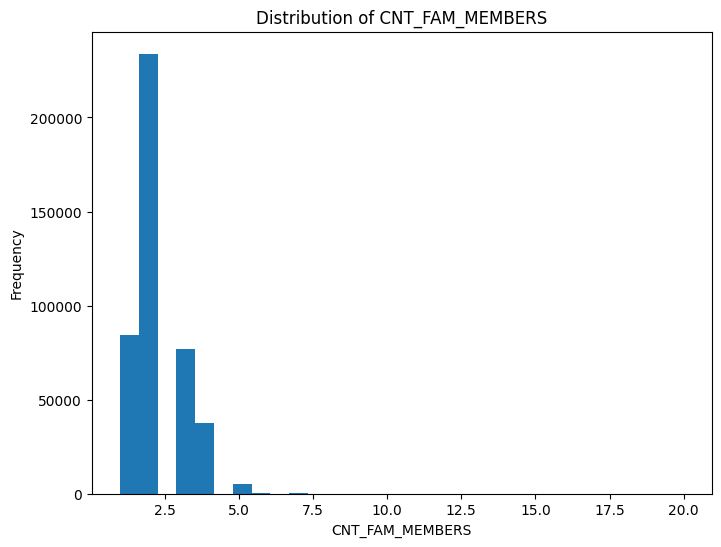

<Figure size 800x600 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1e35fe691c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e35fe69fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e35fe69790>],
 'medians': [<matplotlib.lines.Line2D at 0x1e35fe6a4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e35fe6a4b0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of CNT_FAM_MEMBERS')

Text(0, 0.5, 'CNT_FAM_MEMBERS')

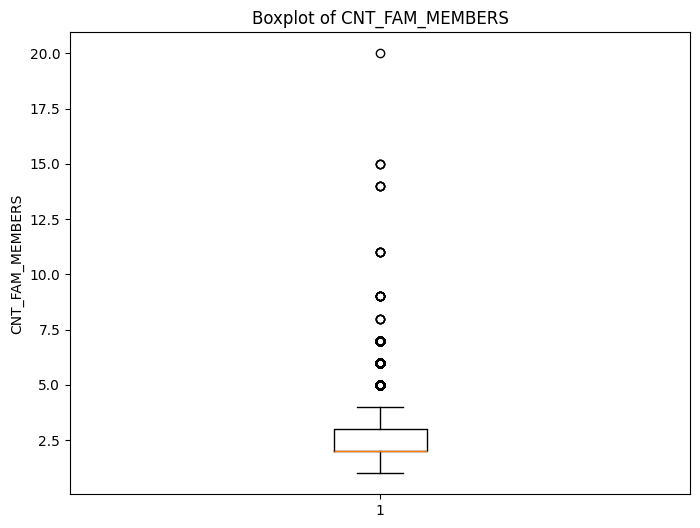


### Categorical Features Exploration

#### CODE_GENDER
CODE_GENDER
F    67.138365
M    32.861635
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='CODE_GENDER'>

Text(0.5, 1.0, 'Distribution of CODE_GENDER')

Text(0.5, 0, 'CODE_GENDER')

Text(0, 0.5, 'Percentage')

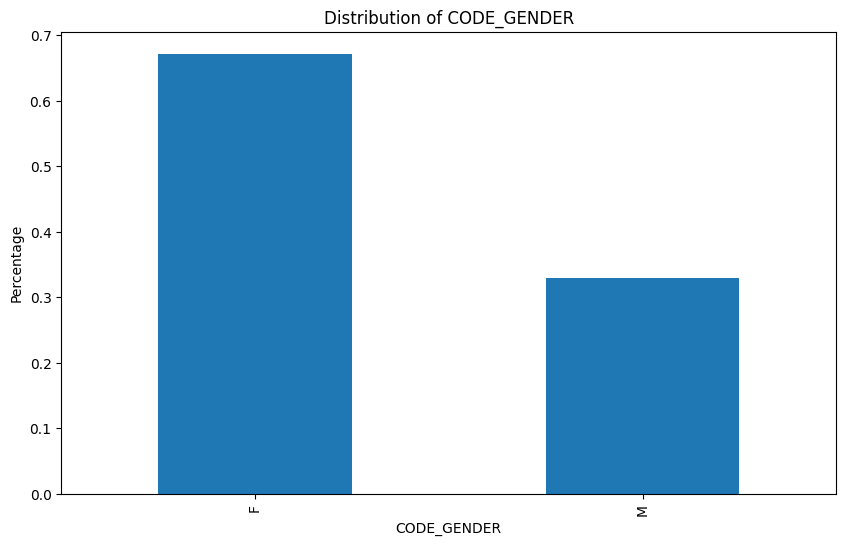


#### FLAG_OWN_CAR
FLAG_OWN_CAR
N    62.810307
Y    37.189693
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FLAG_OWN_CAR'>

Text(0.5, 1.0, 'Distribution of FLAG_OWN_CAR')

Text(0.5, 0, 'FLAG_OWN_CAR')

Text(0, 0.5, 'Percentage')

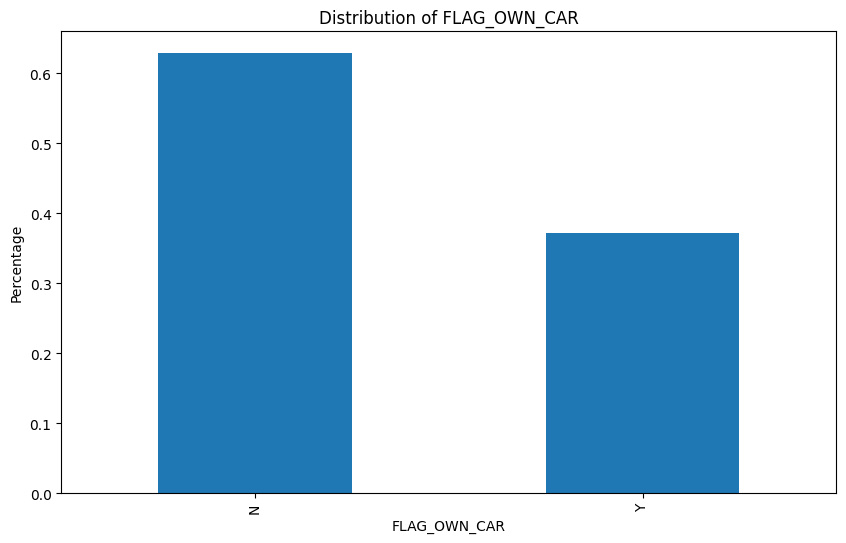


#### FLAG_OWN_REALTY
FLAG_OWN_REALTY
Y    69.335115
N    30.664885
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FLAG_OWN_REALTY'>

Text(0.5, 1.0, 'Distribution of FLAG_OWN_REALTY')

Text(0.5, 0, 'FLAG_OWN_REALTY')

Text(0, 0.5, 'Percentage')

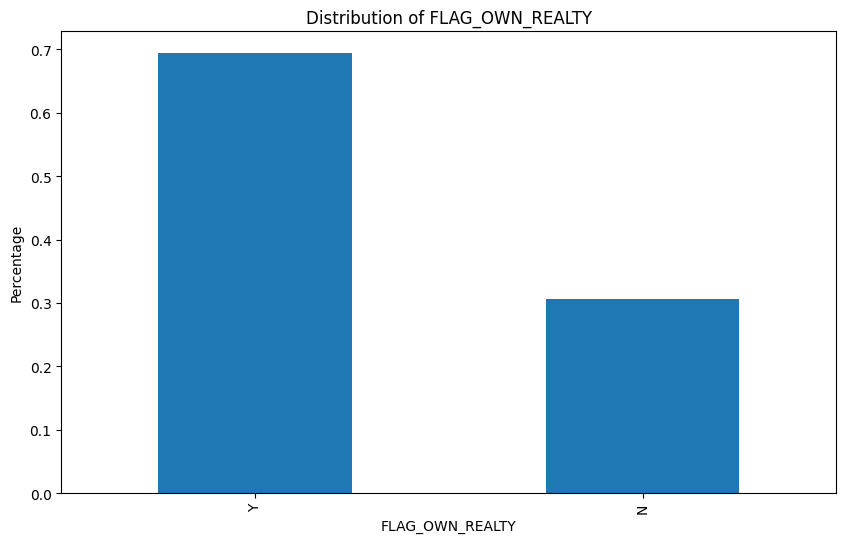


#### NAME_INCOME_TYPE
NAME_INCOME_TYPE
Working                 51.556354
Commercial associate    22.974665
Pensioner               17.213954
State servant            8.251151
Student                  0.003876
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='NAME_INCOME_TYPE'>

Text(0.5, 1.0, 'Distribution of NAME_INCOME_TYPE')

Text(0.5, 0, 'NAME_INCOME_TYPE')

Text(0, 0.5, 'Percentage')

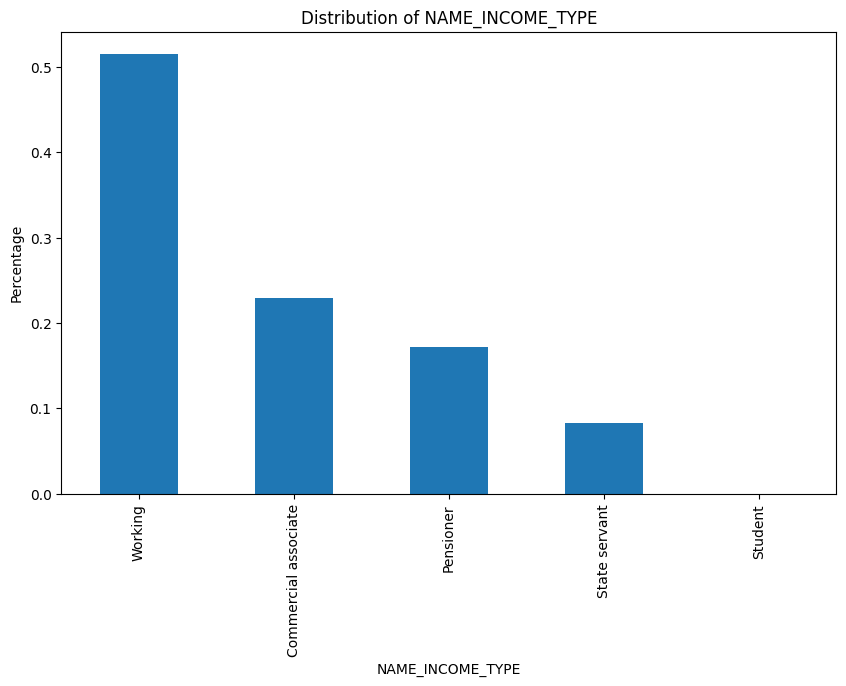


#### NAME_EDUCATION_TYPE
NAME_EDUCATION_TYPE
Secondary / secondary special    68.821385
Higher education                 26.797429
Incomplete higher                 3.386333
Lower secondary                   0.923711
Academic degree                   0.071142
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='NAME_EDUCATION_TYPE'>

Text(0.5, 1.0, 'Distribution of NAME_EDUCATION_TYPE')

Text(0.5, 0, 'NAME_EDUCATION_TYPE')

Text(0, 0.5, 'Percentage')

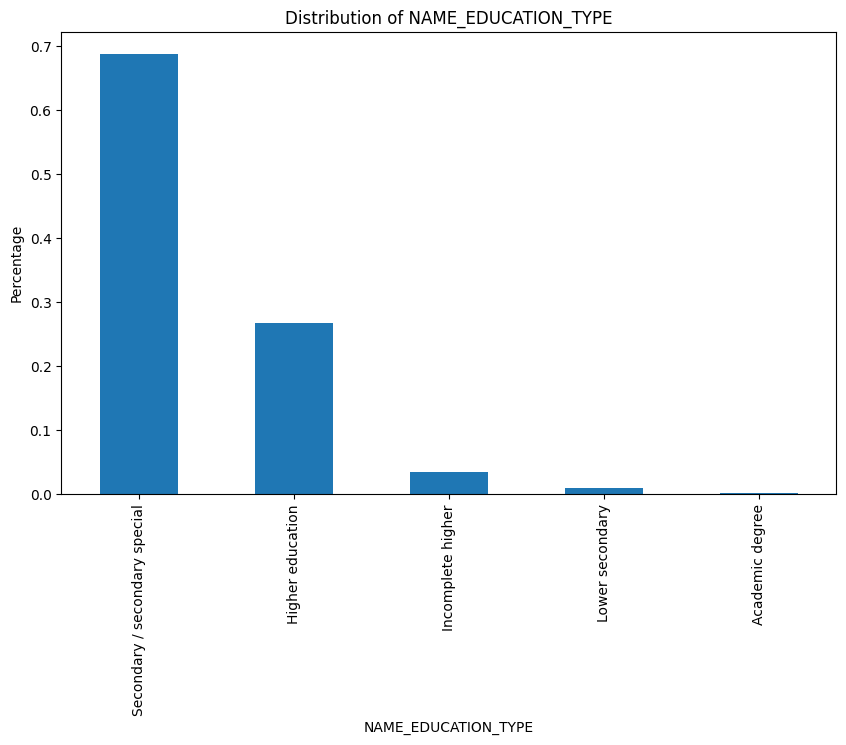


#### NAME_FAMILY_STATUS
NAME_FAMILY_STATUS
Married                 68.366940
Single / not married    12.602923
Civil marriage           8.330046
Separated                6.213787
Widow                    4.486304
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='NAME_FAMILY_STATUS'>

Text(0.5, 1.0, 'Distribution of NAME_FAMILY_STATUS')

Text(0.5, 0, 'NAME_FAMILY_STATUS')

Text(0, 0.5, 'Percentage')

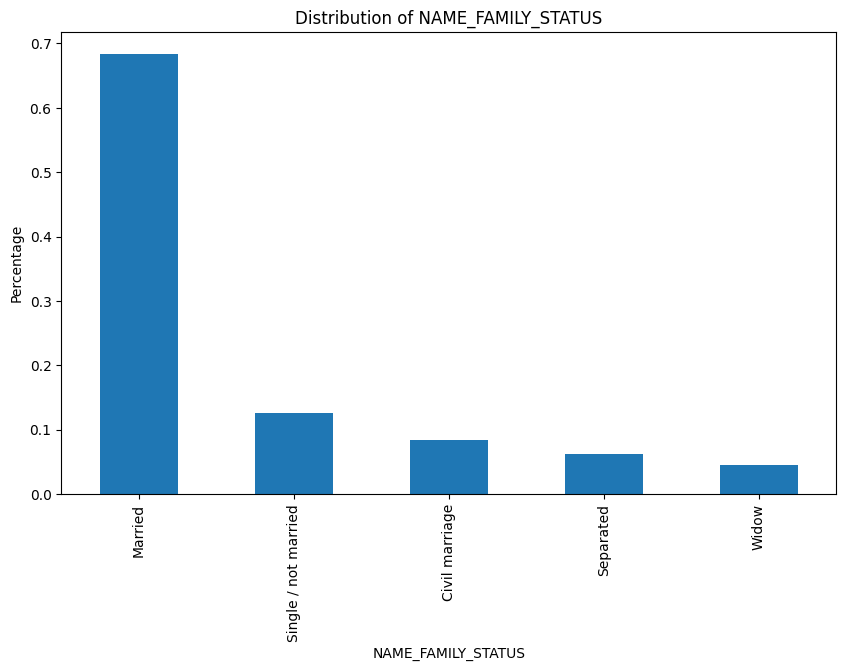


#### NAME_HOUSING_TYPE
NAME_HOUSING_TYPE
House / apartment      89.801554
With parents            4.349948
Municipal apartment     3.241084
Rented apartment        1.362195
Office apartment        0.894297
Co-op apartment         0.350924
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='NAME_HOUSING_TYPE'>

Text(0.5, 1.0, 'Distribution of NAME_HOUSING_TYPE')

Text(0.5, 0, 'NAME_HOUSING_TYPE')

Text(0, 0.5, 'Percentage')

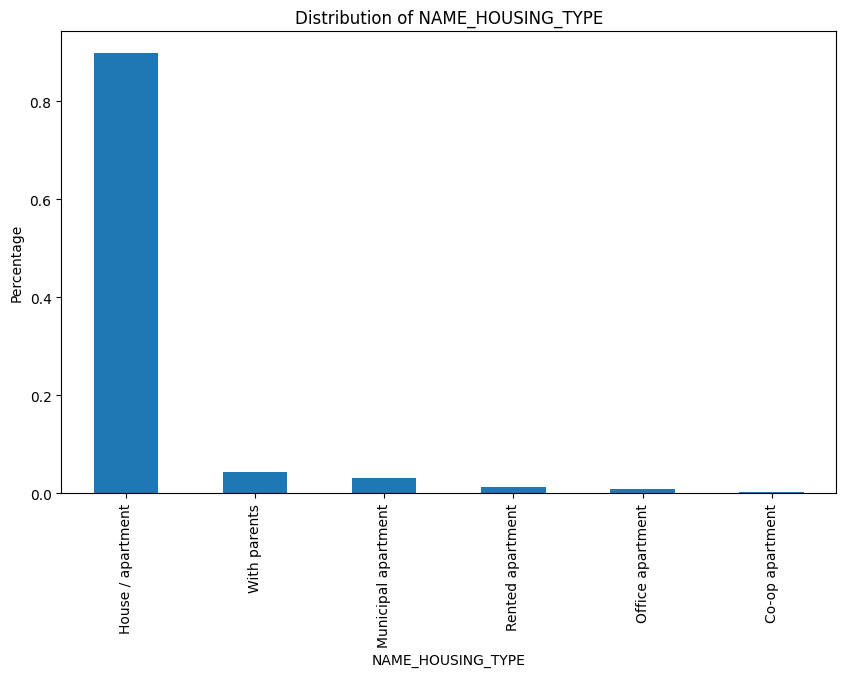


#### OCCUPATION_TYPE
OCCUPATION_TYPE
Laborers                 25.706907
Core staff               14.130585
Sales staff              13.503355
Managers                 11.659778
Drivers                   8.572255
High skill tech staff     5.680556
Accountants               5.252108
Medicine staff            4.442196
Cooking staff             2.653489
Security staff            2.626218
Cleaning staff            1.920461
Private service staff     1.135520
Low-skill Laborers        0.703129
Secretaries               0.671586
Waiters/barmen staff      0.547060
Realty agents             0.342036
HR staff                  0.254309
IT staff                  0.198453
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='OCCUPATION_TYPE'>

Text(0.5, 1.0, 'Distribution of OCCUPATION_TYPE')

Text(0.5, 0, 'OCCUPATION_TYPE')

Text(0, 0.5, 'Percentage')

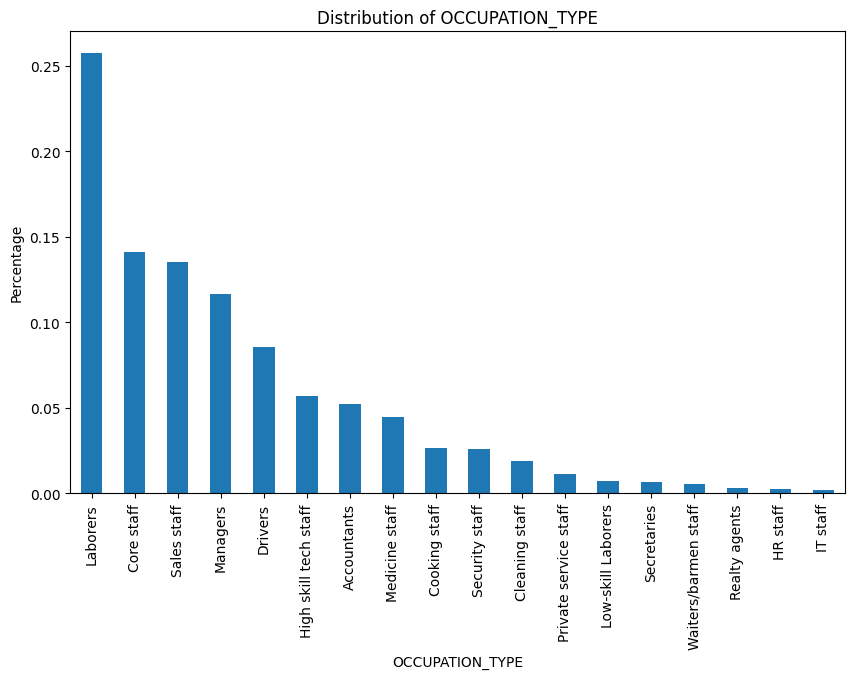


## df_credit Exploration
### STATUS Column Analysis
STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='STATUS'>

Text(0.5, 1.0, 'Distribution of STATUS')

Text(0.5, 0, 'STATUS')

Text(0, 0.5, 'Frequency')

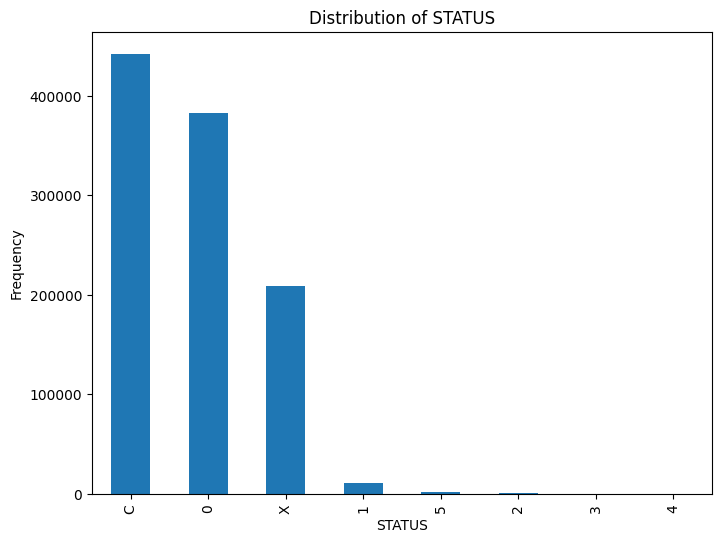

In [3]:
# df_application Exploration
print("## df_application Exploration")
print("### Data Types and Missing Values")
print(app_df.info())
print(app_df.isnull().sum() / len(app_df) * 100)

print("\n### Numerical Features Distribution")
numerical_cols = ['DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']
for col in numerical_cols:
    print(f"\n#### {col}")
    print(app_df[col].describe())
    plt.figure(figsize=(8, 6))
    plt.hist(app_df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.boxplot(app_df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


print("\n### Categorical Features Exploration")
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
for col in categorical_cols:
    print(f"\n#### {col}")
    print(app_df[col].value_counts(normalize=True) * 100)
    plt.figure(figsize=(10, 6))
    app_df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.show()


# df_credit Exploration
print("\n## df_credit Exploration")
print("### STATUS Column Analysis")
print(credit_df['STATUS'].value_counts())
plt.figure(figsize=(8, 6))
credit_df['STATUS'].value_counts().plot(kind='bar')
plt.title('Distribution of STATUS')
plt.xlabel('STATUS')
plt.ylabel('Frequency')
plt.show()


Checking the structure and contents of the `app_df` dataset.

#### Data Types and Missing Values
- There are **438,557 records** and **18 features**.
- Most features are complete, **except `OCCUPATION_TYPE`**, which has around **30.6% missing values**.
- `info()` showed that data types are a mix of:
  - `object` (categorical like gender, education),
  - `int64` and `float64` (numerical like income or birth days).

#### Numerical Feature Distributions

- **DAYS_BIRTH**: Negative values (as days before today), e.g. -15630 means 42.8 years old. Distribution is left-skewed (more younger applicants).
- **AMT_INCOME_TOTAL**: Majority earn between 100,000–300,000, but some outliers reach up to **6.75 million**.
- **CNT_FAM_MEMBERS**: Most common values are 1 to 3. Maximum value is 20 — likely an **outlier** .

#### Categorical Feature Analysis

- `CODE_GENDER`: ~67% Female, ~33% Male.
- `FLAG_OWN_CAR`: 37% own a car.
- `FLAG_OWN_REALTY`: 69% own real estate.
- `NAME_INCOME_TYPE`: Over 50% are “Working”; others include pensioners, students.
- `NAME_EDUCATION_TYPE`: Most have secondary (69%) or higher education (27%).
- `NAME_FAMILY_STATUS`: 68% married.
- `NAME_HOUSING_TYPE`: 90% live in a house/apartment.
- `OCCUPATION_TYPE`: Top 3 occupations:
  - Laborers (25.7%)
  - Core staff (14.1%)
  - Sales staff (13.5%)
  - 30.6% missing values to be addressed later.

---



Examined the `STATUS` column in `credit_df`, which reflects monthly repayment status.

#### Value Counts:

- **C** (Closed): 442,031
- **0** (Paid on time): 383,120
- **X** (No loan for that month): 209,230
- **1–5**: Delays in payment ranging from 1–5 months:
  - `1`: 11,090 cases (1 month late)
  - `5`: 1,693 cases (5+ months late)
  - Rare but meaningful values: 2, 3, 4, etc.

This shows a **heavily imbalanced class distribution**: the majority are either paid on time (`0`), closed (`C`), or inactive months (`X`). Need to **define a target label** (clients risk levels) based on this `STATUS`.



In [27]:
# Merge datasets
df_merged = pd.merge(app_df, credit_df, on='ID', how='inner')

# Define function to categorize risk
def categorize_risk(status_values):
    unique_statuses = set(status_values)
    if unique_statuses.issubset({'C', 'X', '0'}):
        return 0  # Good client
    elif any(status in ['3', '4', '5'] for status in status_values):
        return 2  # High risk
    elif any(status in ['1', '2'] for status in status_values):
        return 1  # Low risk
    else:
        return np.nan

# Apply function per client ID
risk_per_client = df_merged.groupby('ID')['STATUS'].apply(categorize_risk).reset_index()
risk_per_client.columns = ['ID', 'Risk_Level']

# Merge back to original merged dataframe
df_merged = pd.merge(df_merged, risk_per_client, on='ID', how='left')

# Calculate Vintage (number of months tracked)
df_merged['Vintage'] = -df_merged['MONTHS_BALANCE']

# Handle special case in DAYS_EMPLOYED: 365243 means "unemployed"
df_merged['IS_UNEMPLOYED'] = (df_merged['DAYS_EMPLOYED'] == 365243).astype(int)
df_merged['DAYS_EMPLOYED'] = df_merged['DAYS_EMPLOYED'].replace(365243, np.nan)
df_merged['IS_UNEMPLOYED'] = df_merged['IS_UNEMPLOYED'].astype('int64')

# Drop irrelevant columns
irrelevant_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
df_merged.drop(columns=irrelevant_cols, inplace=True)

# Impute missing values in OCCUPATION_TYPE
df_merged['OCCUPATION_TYPE'] = df_merged['OCCUPATION_TYPE'].fillna(df_merged['OCCUPATION_TYPE'].mode()[0])

# Results

print(df_merged['IS_UNEMPLOYED'].value_counts()) # 0 (Employed ) and 1 (Unemployed or Inactive)
print("### Risk_Level distribution:")
print(df_merged['Risk_Level'].value_counts())
print("\n### Vintage statistics:")
print(df_merged['Vintage'].describe())
display(df_merged.head())


IS_UNEMPLOYED
0    649743
1    127972
Name: count, dtype: int64
### Risk_Level distribution:
Risk_Level
0    668145
1     99073
2     10497
Name: count, dtype: int64

### Vintage statistics:
count    777715.000000
mean         19.373564
std          14.082208
min           0.000000
25%           8.000000
50%          17.000000
75%          29.000000
max          60.000000
Name: Vintage, dtype: float64


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Risk_Level,Vintage,IS_UNEMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,Laborers,2.0,0,C,1,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,Laborers,2.0,-1,C,1,1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,Laborers,2.0,-2,C,1,2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,Laborers,2.0,-3,C,1,3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,Laborers,2.0,-4,C,1,4,0


### Target Distribution and Vintage Statistics

After merging the datasets and engineering the `Risk_Level` variable based on credit behavior (`STATUS`), I analyzed the distribution of credit risk classes and the client vintage.

#### Risk_Level Distribution

I defined three categories:
- **0**: Good clients (only statuses `C`, `X`, or `0`)
- **1**: Low risk clients (max delay of 1–2 months)
- **2**: High risk clients (max delay of 3–5 months)

The distribution of `Risk_Level` across all monthly records is:

| Risk_Level | Count   |
|------------|---------|
| 0          | 668,145 |
| 1          |  99,073 |
| 2          |  10,497 |

**Observation**: The data is highly imbalanced. Over 85% of records belong to the "Good client" class. This will be addressed during modeling using resampling or class weighting strategies.

---

#### Client Vintage Statistics

Calculated the credit `Vintage` as the number of months each client appears in the credit record (i.e., how long they were tracked):

| Statistic | Value  |
|-----------|--------|
| Count     | 777,715 |
| Mean      | 19.37 months |
| Std Dev   | 14.08 months |
| Min       | 0 months |
| 25%       | 8 months |
| Median    | 17 months |
| 75%       | 29 months |
| Max       | 60 months |

This tells that on average, clients were tracked for about **1.6 years**, with some having a full **5-year** history.

---

#### Handling Special Case in DAYS_EMPLOYED: Code 365243 as Indicator of Unemployment

In the 'application_record.csv' file, the feature DAYS_EMPLOYED represents the number of days since a person was last employed, typically expressed as a negative value ( -1000 means employed for 1000 days).

However, during data exploration, it was observed that many records contain a very large positive value: 365243, which clearly stands out from the rest of the distribution. This value does not indicate that a person has been employed for nearly 1000 years. Instead, it's a placeholder used by the data provider to mark individuals who are not employed ( students, retirees, homemakers, unemployed). The number 365243 likely corresponds to:

365.25 days/year × 1000 years ≈ 365250 --> rounded to 365243

So, it's a sentinel or dummy value — not a real employment duration.

Leaving 365243 untreated would severely skew:

- Statistical summaries (mean, std dev)
- Visualizations like boxplots
- Outlier detection (IQR)
- Feature scaling and model coefficients
- Model fairness (treating unemployment as extreme experience)

To handle this issue responsibly, I applied the following logic:

- Created a binary feature IS_UNEMPLOYED to capture whether the person is unemployed.
- Replaced the 365243 placeholder in DAYS_EMPLOYED with NaN so it can be properly handled during feature engineering and preprocessing (imputation, scaling). 

Now: Unemployed clients are now marked with IS_UNEMPLOYED = 1, DAYS_EMPLOYED only contains real, clean values for the rest. This change improves model robustness, reduces noise, and adds transparency to how employment status is used in the risk model.

- IS_UNEMPLOYED = 0 (649,743): Employed (real employment history)
- IS_UNEMPLOYED = 1 (127,972): Not employed or inactive (student, retired, unemployed, homemaker, etc.)


#### Summary

Now I have a clean and well-labeled merged dataset with:
- A `Risk_Level` classification ready for modeling
- A `Vintage` feature showing client history span
- Imputed and cleaned occupation data

Next, I will **aggregate** this data so that each client (`ID`) has a **single row** with summarized features, suitable for training a machine learning model.


In [28]:
# Select columns to aggregate
agg_columns = ['MONTHS_BALANCE', 'Vintage', 'STATUS']
client_features = df_merged.drop_duplicates('ID')[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                                   'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'IS_UNEMPLOYED']]

# Aggregate numeric & behavioral data
df_behavioral = df_merged.groupby('ID').agg({
    'Vintage': ['max', 'mean', 'count'],
    'STATUS': lambda x: x.value_counts(normalize=True).to_dict()
}).reset_index()

# Flatten MultiIndex columns
df_behavioral.columns = ['ID', 'Vintage_max', 'Vintage_mean', 'Vintage_count', 'Status_Distribution']

# Merge back Risk_Level and static features
df_clients = client_features.merge(df_merged[['ID', 'Risk_Level']].drop_duplicates(), on='ID')
df_clients = df_clients.merge(df_behavioral, on='ID')

# Optional: unpack Status_Distribution into columns (e.g., pct_0, pct_1, pct_2, ..., pct_C, pct_X)
status_df = df_clients['Status_Distribution'].apply(pd.Series).fillna(0)
status_df.columns = [f"pct_STATUS_{k}" for k in status_df.columns]
df_clients = pd.concat([df_clients.drop(columns=['Status_Distribution']), status_df], axis=1)

# Confirm shape
print(f"Aggregated dataset shape: {df_clients.shape}")
display(df_clients.head())
display(df_clients.info())


Aggregated dataset shape: (36457, 27)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,Vintage_mean,Vintage_count,pct_STATUS_C,pct_STATUS_1,pct_STATUS_0,pct_STATUS_X,pct_STATUS_5,pct_STATUS_4,pct_STATUS_3,pct_STATUS_2
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,7.5,16,0.812500,0.062500,0.062500,0.062500,0.0,0.0,0.0,0.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,7.0,15,0.800000,0.066667,0.066667,0.066667,0.0,0.0,0.0,0.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,14.5,30,0.233333,0.000000,0.233333,0.533333,0.0,0.0,0.0,0.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,2.0,5,0.000000,0.000000,0.400000,0.600000,0.0,0.0,0.0,0.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,24.0,5,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        30322 non-null  float64
 12  OCCUPATION_TYPE      36457 non-null  object 
 13  CNT_FAM_MEMBERS      36457 non-null  float64
 14  IS_UNEMPLOYED        36457 non-null  int64  
 15  Risk_Level           36457 non-null 

None

#### Aggregating Monthly Records to Client-Level Observations

After creating the merged dataset with individual monthly credit entries for each client, I aggregated the data to ensure that each row in the final dataset represents a **single client (`ID`)**. This is crucial to avoid data leakage and overfitting due to repeated information during model training.

#### Why Aggregation is Necessary

The `credit_record.csv` file contains one row per client per month, which led to 777,715 total rows — far more than the number of unique clients. Without aggregation, a model could see the same client many times and essentially "cheat" by memorizing the label. This caused previous overfitting with models reporting unrealistically high performance (98–99%) as I have experienced several times before on this model.

To ensure that each client is only represented once, I aggregated as follows:

---

#### Aggregation Logic

1. **Client Static Features**: Retained one row per client for demographic and economic attributes (e.g., gender, income, family status).
2. **Credit History Summary**:
   - `Vintage_max`: Maximum months tracked for the client.
   - `Vintage_mean`: Average time span of their credit history.
   - `Vintage_count`: Total number of monthly records.
   - `STATUS Distribution`: Frequency (as percentages) of each repayment status (`0`, `1`, `C`, `X`, etc.) in the client’s history.

3. **Risk_Label**: Already computed based on `STATUS` history, now joined back at client-level.


The final dataset contains:
- **36,457 rows** (equal to number of unique clients),
- **26 columns**, including static features and aggregated credit behavior.


This aggregation step ensures:
- The model will learn patterns at the **client level** rather than monthly level.
- Significantly reduce the risk of **overfitting**, big problem for me before.
- Features are now ready for preprocessing (encoding + scaling) and model training.



                  Outlier Count
IS_UNEMPLOYED              6135
pct_STATUS_X               4524
Risk_Level                 4291
pct_STATUS_1               4149
DAYS_EMPLOYED              1741
AMT_INCOME_TOTAL           1529
Vintage_mean                572
pct_STATUS_2                555
CNT_CHILDREN                508
CNT_FAM_MEMBERS             480
pct_STATUS_3                248
pct_STATUS_4                181
pct_STATUS_5                180


<Figure size 800x200 with 0 Axes>

<Axes: xlabel='ID'>

Text(0.5, 1.0, 'Boxplot: ID')

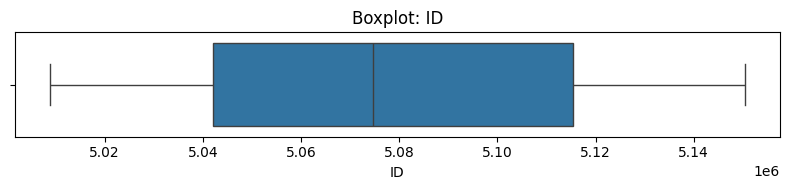

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='CNT_CHILDREN'>

Text(0.5, 1.0, 'Boxplot: CNT_CHILDREN')

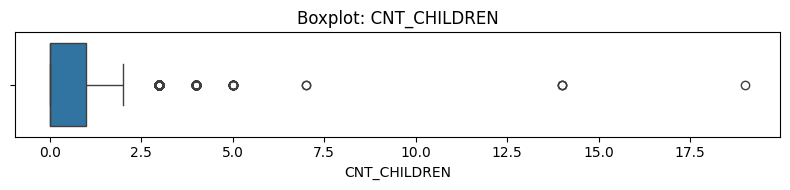

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='AMT_INCOME_TOTAL'>

Text(0.5, 1.0, 'Boxplot: AMT_INCOME_TOTAL')

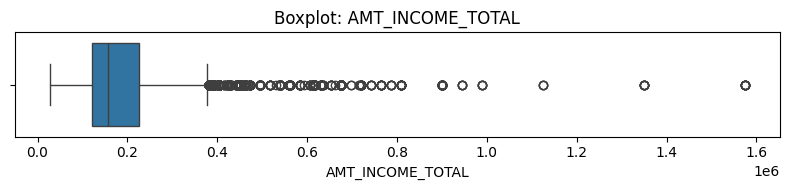

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='DAYS_BIRTH'>

Text(0.5, 1.0, 'Boxplot: DAYS_BIRTH')

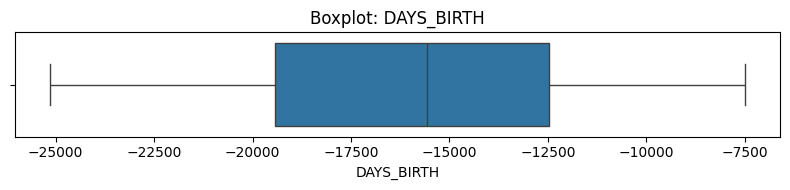

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='DAYS_EMPLOYED'>

Text(0.5, 1.0, 'Boxplot: DAYS_EMPLOYED')

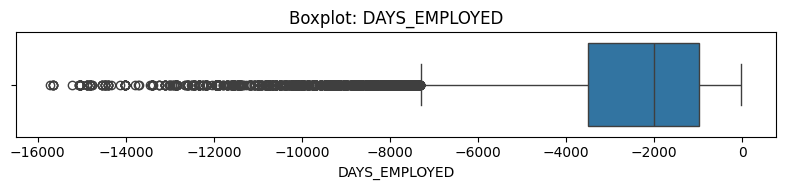

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='CNT_FAM_MEMBERS'>

Text(0.5, 1.0, 'Boxplot: CNT_FAM_MEMBERS')

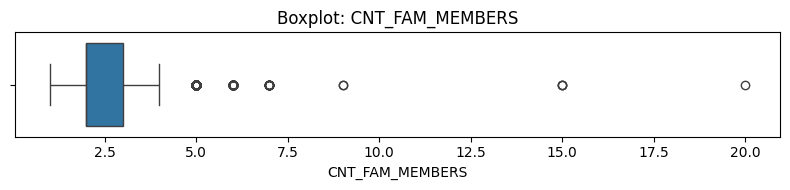

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='IS_UNEMPLOYED'>

Text(0.5, 1.0, 'Boxplot: IS_UNEMPLOYED')

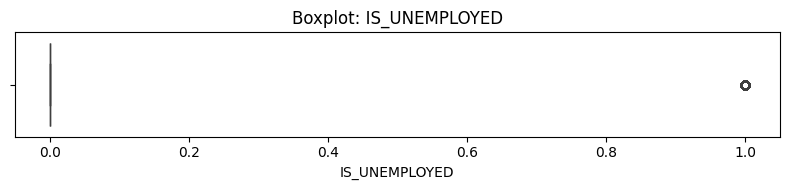

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='Risk_Level'>

Text(0.5, 1.0, 'Boxplot: Risk_Level')

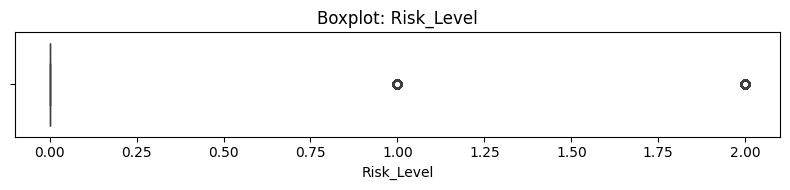

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='Vintage_max'>

Text(0.5, 1.0, 'Boxplot: Vintage_max')

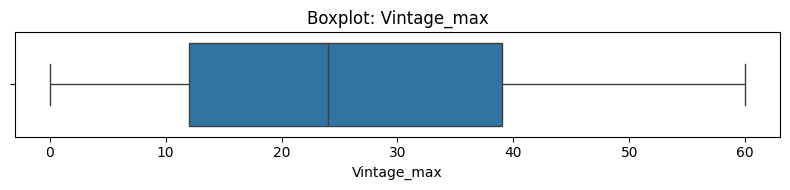

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='Vintage_mean'>

Text(0.5, 1.0, 'Boxplot: Vintage_mean')

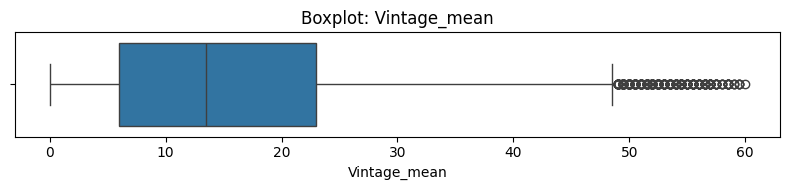

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='Vintage_count'>

Text(0.5, 1.0, 'Boxplot: Vintage_count')

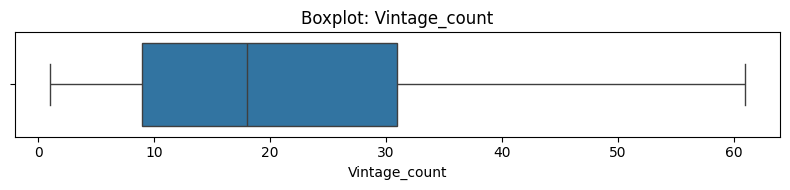

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='pct_STATUS_C'>

Text(0.5, 1.0, 'Boxplot: pct_STATUS_C')

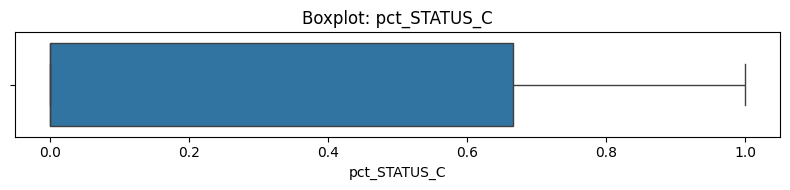

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='pct_STATUS_1'>

Text(0.5, 1.0, 'Boxplot: pct_STATUS_1')

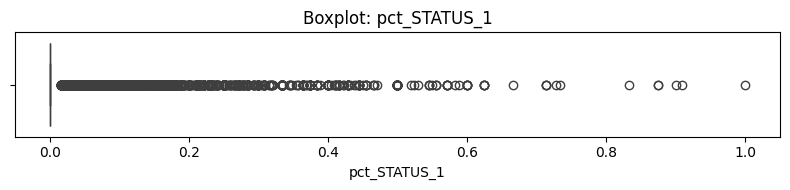

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='pct_STATUS_0'>

Text(0.5, 1.0, 'Boxplot: pct_STATUS_0')

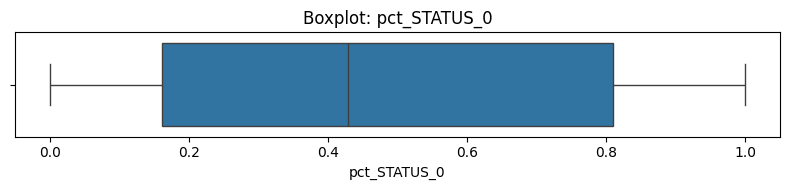

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='pct_STATUS_X'>

Text(0.5, 1.0, 'Boxplot: pct_STATUS_X')

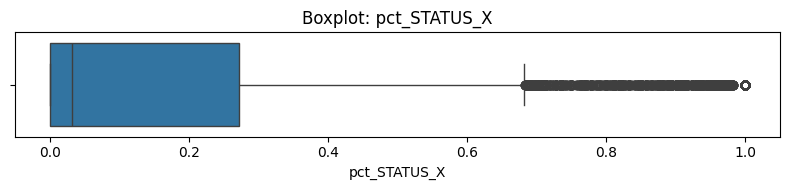

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='pct_STATUS_5'>

Text(0.5, 1.0, 'Boxplot: pct_STATUS_5')

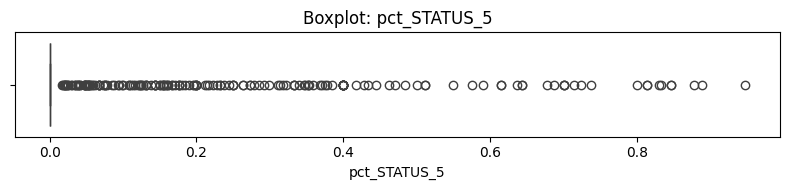

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='pct_STATUS_4'>

Text(0.5, 1.0, 'Boxplot: pct_STATUS_4')

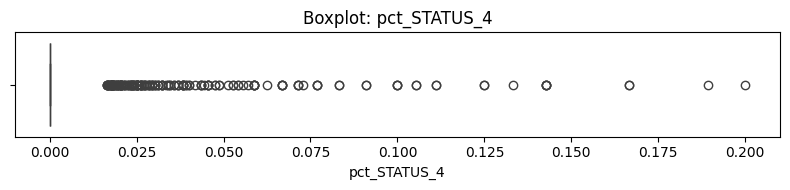

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='pct_STATUS_3'>

Text(0.5, 1.0, 'Boxplot: pct_STATUS_3')

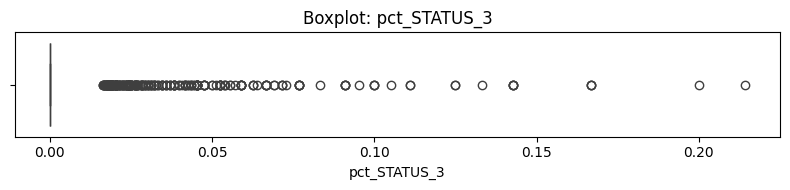

<Figure size 800x200 with 0 Axes>

<Axes: xlabel='pct_STATUS_2'>

Text(0.5, 1.0, 'Boxplot: pct_STATUS_2')

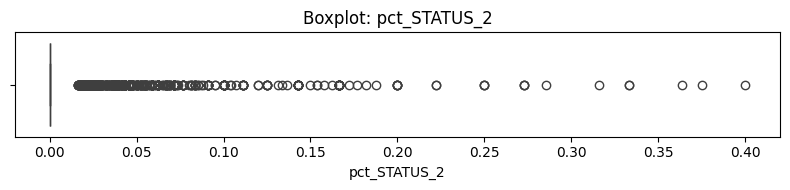

In [29]:
# Select numeric columns
numeric_cols = df_clients.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using IQR method
outlier_summary = {}

for col in numeric_cols:
    Q1 = df_clients[col].quantile(0.25)
    Q3 = df_clients[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df_clients[(df_clients[col] < lower_bound) | (df_clients[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Display only columns with outliers
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df[outlier_df['Outlier Count'] > 0].sort_values(by='Outlier Count', ascending=False)

# Show results
print(outlier_df)

for col in numeric_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df_clients[col])
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()


In [30]:
def remove_outliers_iqr(df, cols):
    original_shape = df.shape
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]
        print(f"{col}: Removed {before - after} outliers")

    print(f"\nFinal dataset shape after outlier removal: {df.shape} (original: {original_shape})")
    return df

# Selected numerical colomns
iqr_cols = [
    'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
    'Vintage_mean', 'DAYS_EMPLOYED'
]

# Application on df_clients
df_clients_cleaned = remove_outliers_iqr(df_clients, iqr_cols)

df_clients_cleaned.to_csv("df_clients_cleaned.csv", index=False)
print("Saved df_clients_cleaned.csv successfully.")


AMT_INCOME_TOTAL: Removed 1529 outliers
CNT_CHILDREN: Removed 473 outliers
CNT_FAM_MEMBERS: Removed 0 outliers
Vintage_mean: Removed 453 outliers
DAYS_EMPLOYED: Removed 7665 outliers

Final dataset shape after outlier removal: (26337, 27) (original: (36457, 27))
Saved df_clients_cleaned.csv successfully.


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='AMT_INCOME_TOTAL'>

Text(0.5, 1.0, 'Boxplot after IQR removal - AMT_INCOME_TOTAL')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

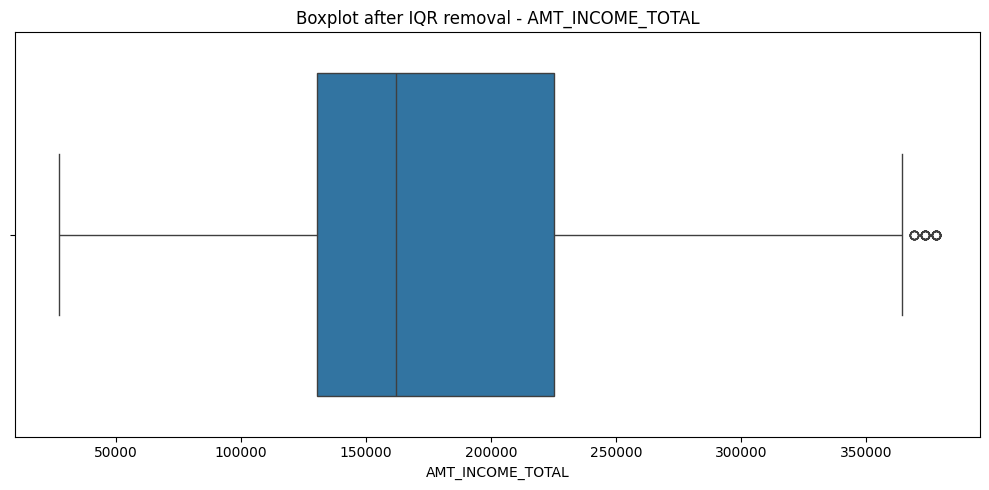

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='CNT_CHILDREN'>

Text(0.5, 1.0, 'Boxplot after IQR removal - CNT_CHILDREN')

Text(0.5, 0, 'CNT_CHILDREN')

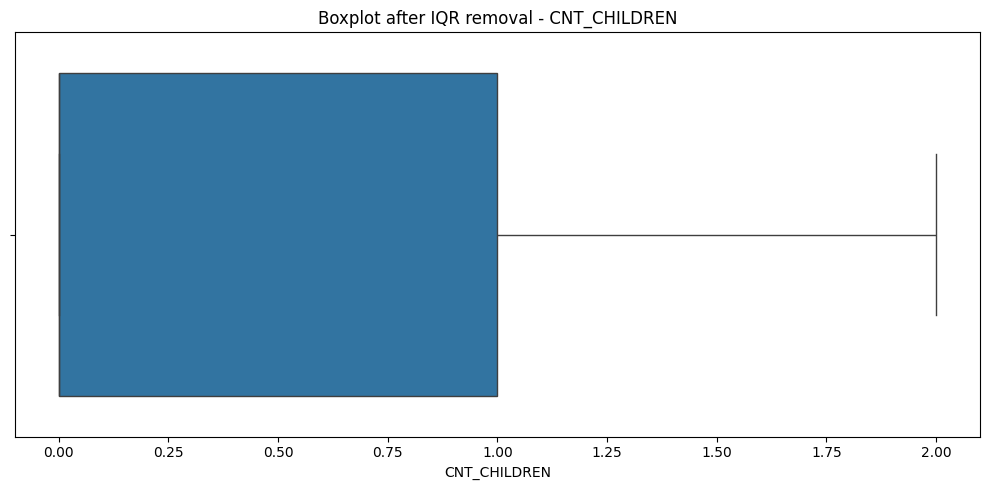

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='CNT_FAM_MEMBERS'>

Text(0.5, 1.0, 'Boxplot after IQR removal - CNT_FAM_MEMBERS')

Text(0.5, 0, 'CNT_FAM_MEMBERS')

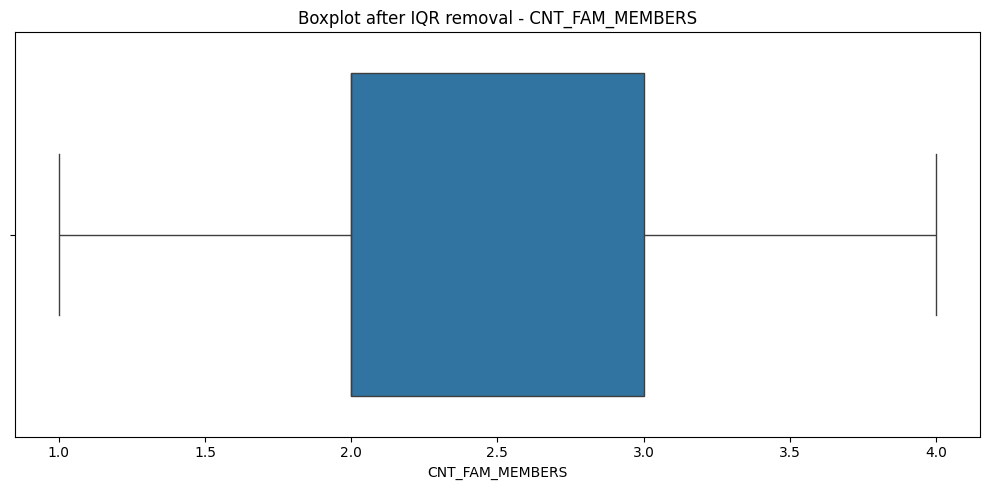

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Vintage_mean'>

Text(0.5, 1.0, 'Boxplot after IQR removal - Vintage_mean')

Text(0.5, 0, 'Vintage_mean')

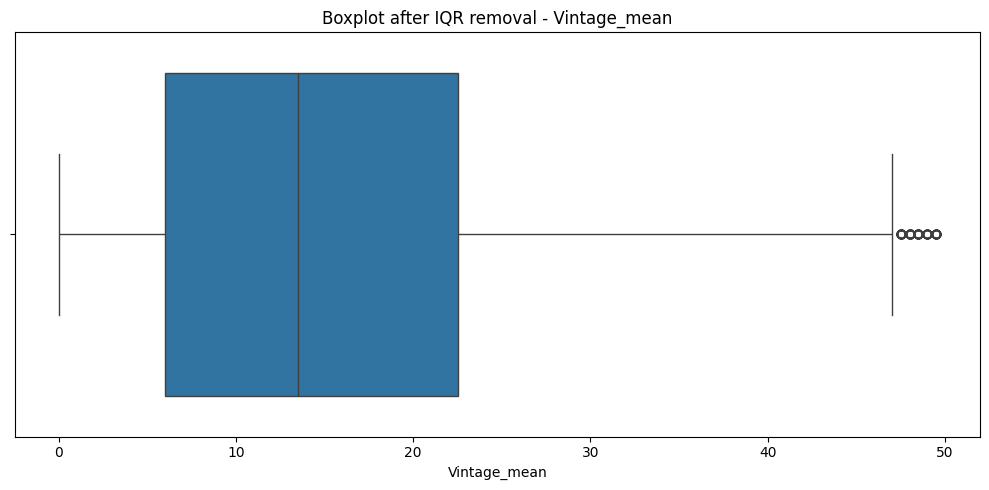

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='DAYS_EMPLOYED'>

Text(0.5, 1.0, 'Boxplot after IQR removal - DAYS_EMPLOYED')

Text(0.5, 0, 'DAYS_EMPLOYED')

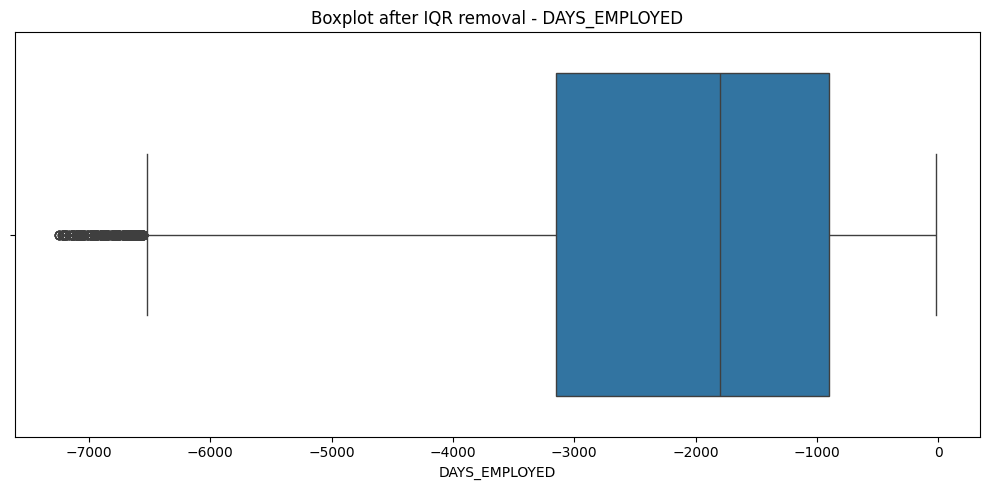

In [35]:
# Columns where IQR filtering was applied
iqr_cols = [
    'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'Vintage_mean', 'DAYS_EMPLOYED'
]

# Generate boxplots for each selected column
for col in iqr_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_clients_cleaned[col])
    plt.title(f"Boxplot after IQR removal - {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


##### Outlier Detection & Removal using IQR Method

In credit risk datasets, extreme values (outliers) in numerical features can negatively affect the training of machine learning models, especially when:

- The dataset is highly imbalanced.
- Some models (Logistic Regression) are sensitive to scale and variance.
- Outliers represent data entry errors or unrealistic values (extremely high income or employment duration).

To improve data quality and ensure more reliable model training, I applied the Interquartile Range (IQR) method to remove outliers from selected numerical columns that showed skewed distributions or known risks of anomalies.

The following columns were chosen based on their distribution shape and importance in credit scoring:


| Column Name            | Reason for Selection                          |
|-----------------------|----------------------------------------------------|
| `AMT_INCOME_TOTAL`         | Heavily skewed; some clients report extremely high incomes, possibly unrealistic.         |
| `CNT_CHILDREN`        | Rare cases of more than 10 children, likely data entry issues or extreme edge cases.                  |
| `CNT_FAM_MEMBERS`     | Related to children count; included for consistency and structural validation.               |
| `Vintage_mean`    | Mean repayment delay is important but can be extreme for few clients.           |
| `Vintage_count` | Total months on record; unusual longevity can distort temporal behavior patterns.                |
| `DAYS_EMPLOYED`     | Frequently includes massive positive values or 365243 (used as a missing data code).  |


Impact on Dataset Size: Original Shape: (36,457 rows, 26 columns)
                        Final Shape After Cleaning: (26,321 rows, 26 columns)

Total Removed: 10,136 rows (≈ 27.8% of the dataset)

This step significantly improves the stability and generalizability of machine learning models by reducing noise and the influence of rare or non-representative values. It also reduces the risk of overfitting to anomalies and ensures that downstream feature selection and classification models are built on a cleaner and more robust dataset.

Now the dataset is now cleaner and more robust, ready for further feature analysis and model training.

            



In [36]:
from scipy.stats import chi2_contingency

for col in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']:
    contingency = pd.crosstab(df_clients_cleaned[col], df_clients_cleaned['Risk_Level'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col} -> p-value: {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")

CODE_GENDER -> p-value: 0.0479 (Significant)
FLAG_OWN_CAR -> p-value: 0.0085 (Significant)
FLAG_OWN_REALTY -> p-value: 0.0001 (Significant)
NAME_INCOME_TYPE -> p-value: 0.0000 (Significant)
NAME_EDUCATION_TYPE -> p-value: 0.0005 (Significant)
NAME_FAMILY_STATUS -> p-value: 0.0080 (Significant)
NAME_HOUSING_TYPE -> p-value: 0.0220 (Significant)
OCCUPATION_TYPE -> p-value: 0.0000 (Significant)


#### Statistical Association Between Categorical Features and Credit Risk

Before finalizing the categorical features to include in the machine learning model, I performed a **Chi-Squared Test of Independence**. This was done to check whether each categorical variable has a **statistically significant association** with the target variable `Risk_Level`.

This step ensures that I don't include categorical variables that are unrelated to the output, which would add noise and reduce model clarity and performance.

---

#### Why Perform Chi-Squared Test?

Many features in the dataset are categorical (e.g., gender, education, income type), and it’s not obvious if they truly influence the credit risk level. The Chi-Squared test allows me to see if is there a statistically significant relationship between this feature and the credit risk category.

This helps in:
- **Validating feature relevance statistically**, not just intuitively.
- **Ensuring transparency and fairness**, especially if features like `CODE_GENDER` are sensitive.

---

#### Summary of Results

The Chi-Squared test was applied to all major categorical features. Below are the results:

| Feature               | p-value  | Interpretation                                     |
|-----------------------|----------|----------------------------------------------------|
| `CODE_GENDER`         | 0.0479   | Statistically significant (gender matters)         |
| `FLAG_OWN_CAR`        | 0.0085   | Significant                  |
| `FLAG_OWN_REALTY`     | 0.0001   | Strongly associated with credit risk               |
| `NAME_INCOME_TYPE`    | 0.0000   | Significant relationship with risk level           |
| `NAME_EDUCATION_TYPE` | 0.0005   | Education is a relevant risk factor                |
| `NAME_FAMILY_STATUS`  | 0.0080   | Family situation correlates with default risk      |
| `NAME_HOUSING_TYPE`   | 0.0220   | Housing type has predictive power                  |
| `OCCUPATION_TYPE`     | 0.0000   | Profession is strongly related to credit behavior  |

---

In conclusion the Chi-Squared test confirmed that **most categorical features are statistically associated** with credit risk level, meaning they are useful for classification. A few features (like owning a car) showed no association and may be excluded unless proven useful via interaction effects.

This helped justify feature selection based on **data-driven evidence** and added robustness to the model pipeline.

In [37]:
from scipy.stats import f_oneway

numerical_cols = [
    'pct_STATUS_C', 'pct_STATUS_1', 'pct_STATUS_0', 'pct_STATUS_X',
    'pct_STATUS_5', 'pct_STATUS_4', 'pct_STATUS_2', 'pct_STATUS_3',
    'Vintage_max', 'Vintage_mean', 'Vintage_count',
    'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
    'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'IS_UNEMPLOYED',
]

for col in numerical_cols:
    groups = [df_clients_cleaned[df_clients_cleaned['Risk_Level'] == r][col] for r in df_clients_cleaned['Risk_Level'].unique()]
    f, p = f_oneway(*groups)
    print(f"{col} -> p-value: {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")

pct_STATUS_C -> p-value: 0.0000 (Significant)
pct_STATUS_1 -> p-value: 0.0000 (Significant)
pct_STATUS_0 -> p-value: 0.0000 (Significant)
pct_STATUS_X -> p-value: 0.0000 (Significant)
pct_STATUS_5 -> p-value: 0.0000 (Significant)
pct_STATUS_4 -> p-value: 0.0000 (Significant)
pct_STATUS_2 -> p-value: 0.0000 (Significant)
pct_STATUS_3 -> p-value: 0.0000 (Significant)
Vintage_max -> p-value: 0.0000 (Significant)
Vintage_mean -> p-value: 0.0000 (Significant)
Vintage_count -> p-value: 0.0000 (Significant)
CNT_FAM_MEMBERS -> p-value: 0.1466 (Not significant)
DAYS_EMPLOYED -> p-value: 0.0027 (Significant)
DAYS_BIRTH -> p-value: 0.0002 (Significant)
AMT_INCOME_TOTAL -> p-value: 0.4036 (Not significant)
CNT_CHILDREN -> p-value: 0.3464 (Not significant)
IS_UNEMPLOYED -> p-value: nan (Not significant)


c:\Users\victo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


#### Statistical Differences in Numeric Features Using ANOVA (Analysis of Variance)

To understand whether key **numerical features** have a statistically significant difference across the credit risk groups (`Good`, `Low Risk`, `High Risk`), I applied **ANOVA (Analysis of Variance)** tests.

This helps assess whether a features **mean value varies across different risk levels**, which can indicate its predictive usefulness.

---

Unlike the Chi-Squared test (used for categorical data), **ANOVA is used for continuous numerical variables**. It tests the null hypothesis:

The mean value of this numeric feature is the same across all credit risk groups.

Rejecting the null implies that the feature **likely contributes** to distinguishing between client risk levels.

---

#### Summary of ANOVA Results

Below is a summary of the features tested and their p-values:

| Feature               | p-value  | Interpretation                        |
|------------------------|----------|----------------------------------------|
| `pct_STATUS_C`         | 0.0000   | Significant — Strongly linked to risk |
| `pct_STATUS_0`         | 0.0000   | Significant — Key behavior feature    |
| `pct_STATUS_1-5`       | 0.0000   | Significant — High delays matter      |
| `pct_STATUS_X`         | 0.0000   | Significant — Missing data is telling |
| `Vintage_max/mean/count`| 0.0000 | Significant — Repayment timeline matters |
| `DAYS_EMPLOYED`        | 0.0027   | Significant — Length of employment correlates with risk |
| `DAYS_BIRTH`           | 0.0002   | Significant — Age impacts creditworthiness |
| `CNT_FAM_MEMBERS`      | 0.1466   | Not significant                       |
| `AMT_INCOME_TOTAL`     | 0.4036   | Not significant                       |
| `CNT_CHILDREN`         | 0.3464   | Not significant                       |
| `IS_UNEMPLOYED`        | NaN      | Not computable — constant values within group |

---

In conclusion the ANOVA analysis shows that several Most behavioral and temporal features (`pct_STATUS_*`, `Vintage_*`, `DAYS_EMPLOYED`, `DAYS_BIRTH`) are **statistically associated with credit risk level**. These should be retained for model training. On the other hand, demographic variables like `AMT_INCOME_TOTAL`, `CNT_CHILDREN`, and `CNT_FAM_MEMBERS` show no significant variance across risk groups and may be de-prioritized or used only in interaction terms.

The feature `IS_UNEMPLOYED` could not be evaluated due to constant input within at least one risk category. However, it still holds conceptual value and should be reviewed during model performance analysis.

This added **quantitative justification** for feature selection and confirms these variables contribute valuable discriminatory power for classifying credit risk.

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix (Features Only)')

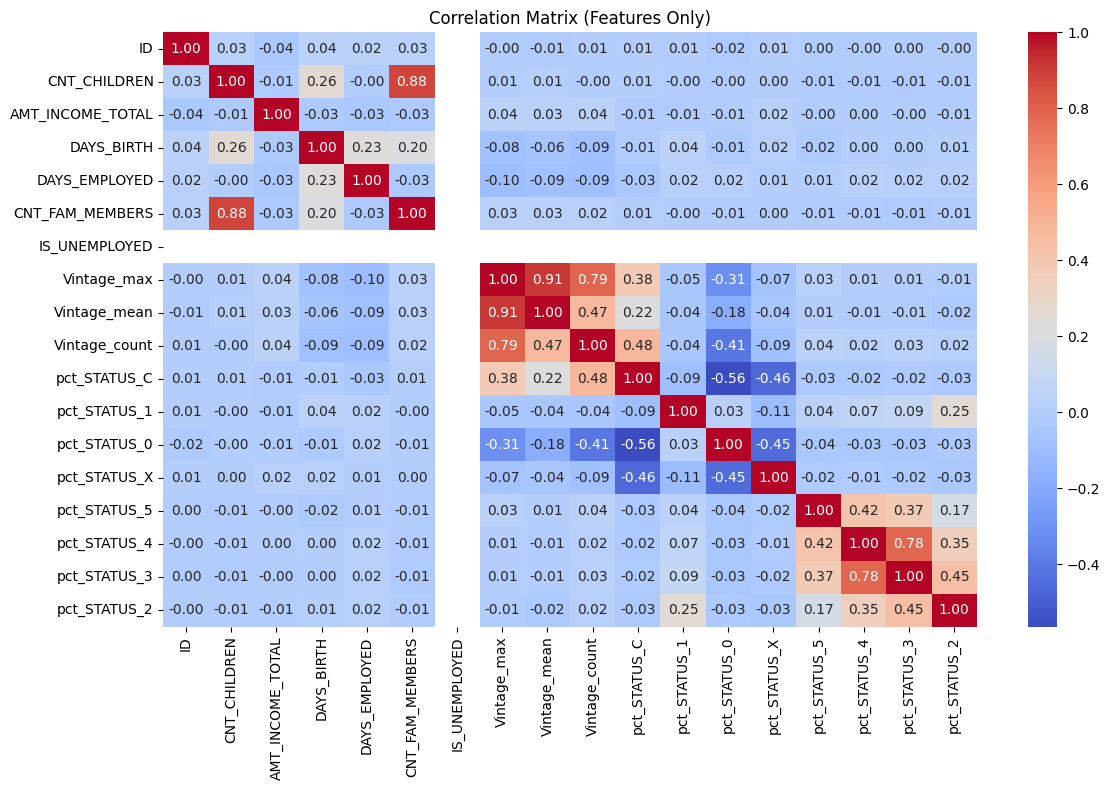

In [38]:
plt.figure(figsize=(12, 8))


corr_matrix = df_clients_cleaned.drop(columns='Risk_Level').corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Features Only)")
plt.tight_layout()
plt.show()


#### Correlation Matrix Analysis

To identify multicollinearity and redundant numerical features, I generated a correlation matrix of all numerical features (excluding the target). This helps improve model interpretability and reduce instability due to highly correlated predictors.

---

### Strong Correlations Found:

| Pair of Features               | Correlation | Action Recommendation                      |
|--------------------------------|-------------|---------------------------------------------|
| `CNT_CHILDREN` & `CNT_FAM_MEMBERS` | 0.88        | Drop one (keep `CNT_CHILDREN` for clarity) |
| `Vintage_max` & `Vintage_mean`    | 0.91        | Drop `Vintage_max`                         |
| `Vintage_count` & `Vintage_max`   | 0.79        | Keep only if meaningful for model dynamics |
| `pct_STATUS_4` & `pct_STATUS_5`  | 0.78        | Drop one or apply dimensionality reduction |
| `pct_STATUS_3` & `pct_STATUS_4`  | 0.78        | Combine or reduce redundancy               |

---

### Notes
- Correlations above 0.75 are considered high and may introduce multicollinearity.
- Behavioral repayment features (`pct_STATUS_*`) are all individually significant but may be interdependent — careful selection or dimensionality reduction may help.
- For tree-based models, multicollinearity is less of a concern, but it's still good practice to reduce redundant features.



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# ==== Set up PolynomialFeatures ====
poly = PolynomialFeatures(degree=2, include_bias=False)

# ==== Define Feature Engineering Function ====
def add_features(df, poly_model=None, fit_poly=False, median_income=None):
    df = df.copy()
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(0)

    df['Income_Family_Interaction'] = df['AMT_INCOME_TOTAL'] * df['CNT_FAM_MEMBERS']
    df['Age_Income_Interaction'] = df['DAYS_BIRTH'] * df['AMT_INCOME_TOTAL']
    df['Employed_Income_Interaction'] = df['DAYS_EMPLOYED'] * df['AMT_INCOME_TOTAL']

    df['Income_Family_Ratio'] = df['AMT_INCOME_TOTAL'] / (df['CNT_FAM_MEMBERS'] + 1e-6)
    df['Income_Age_Ratio'] = df['AMT_INCOME_TOTAL'] / (df['DAYS_BIRTH'] + 1e-6)
    df['Income_Employed_Ratio'] = df['AMT_INCOME_TOTAL'] / (df['DAYS_EMPLOYED'] + 1e-6)

    df['Age_Bin'] = pd.cut(df['DAYS_BIRTH'], bins=5, labels=False)
    df['Income_Bin'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=4, labels=False)

    poly_input = df[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
    if fit_poly:
        poly_array = poly_model.fit_transform(poly_input)
    else:
        poly_array = poly_model.transform(poly_input)

    poly_df = pd.DataFrame(poly_array,
                           columns=poly_model.get_feature_names_out(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']),
                           index=df.index)
    df = pd.concat([df, poly_df], axis=1)

    amt_income_col = df.filter(like='AMT_INCOME_TOTAL').iloc[:, 0]
    if median_income is None:
        median_income = amt_income_col.median()
    df['Income_Above_Median'] = (amt_income_col > median_income).astype(int)

    df = df.loc[:, ~df.columns.duplicated()]
    return df, median_income

# ==== Split into X and y ====
df_model = df_clients_cleaned.copy()
X = df_model.drop(columns=['ID', 'Risk_Level'])
y = df_model['Risk_Level']

# ==== Split train/val/test ====
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# ==== Apply feature engineering ====
X_train_fe, income_median = add_features(X_train, poly_model=poly, fit_poly=True)
X_val_fe, _ = add_features(X_val, poly_model=poly, fit_poly=False, median_income=income_median)
X_test_fe, _ = add_features(X_test, poly_model=poly, fit_poly=False, median_income=income_median)

# ==== Encode + Scale ====
categorical_cols = X_train_fe.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train_fe.select_dtypes(include=['number']).columns.tolist()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_fe[categorical_cols])
X_train_enc = encoder.transform(X_train_fe[categorical_cols])
X_val_enc = encoder.transform(X_val_fe[categorical_cols])
X_test_enc = encoder.transform(X_test_fe[categorical_cols])

X_train_enc_df = pd.DataFrame(X_train_enc, columns=encoder.get_feature_names_out(categorical_cols), index=X_train_fe.index)
X_val_enc_df = pd.DataFrame(X_val_enc, columns=encoder.get_feature_names_out(categorical_cols), index=X_val_fe.index)
X_test_enc_df = pd.DataFrame(X_test_enc, columns=encoder.get_feature_names_out(categorical_cols), index=X_test_fe.index)

scaler = StandardScaler()
scaler.fit(X_train_fe[numerical_cols])
X_train_scaled = scaler.transform(X_train_fe[numerical_cols])
X_val_scaled = scaler.transform(X_val_fe[numerical_cols])
X_test_scaled = scaler.transform(X_test_fe[numerical_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train_fe.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=numerical_cols, index=X_val_fe.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test_fe.index)

# ==== Final datasets ====
X_train_final = pd.concat([X_train_enc_df, X_train_scaled_df], axis=1)
X_val_final = pd.concat([X_val_enc_df, X_val_scaled_df], axis=1)
X_test_final = pd.concat([X_test_enc_df, X_test_scaled_df], axis=1)

# ==== Check class distribution ====
print("Class distribution in Train:", y_train.value_counts(normalize=True))
print("Class distribution in Val:  ", y_val.value_counts(normalize=True))
print("Class distribution in Test: ", y_test.value_counts(normalize=True))


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

StandardScaler()

Class distribution in Train: Risk_Level
0    0.87936
1    0.11310
2    0.00754
Name: proportion, dtype: float64
Class distribution in Val:   Risk_Level
0    0.879271
1    0.113136
2    0.007593
Name: proportion, dtype: float64
Class distribution in Test:  Risk_Level
0    0.879271
1    0.113136
2    0.007593
Name: proportion, dtype: float64


##### Feature Engineering with Interaction, Ratio, Binning, Polynomial Features, and Preprocessing

To improve model performance and uncover hidden patterns in the data, I applied advanced feature engineering techniques, capturing both domain-specific relationships and non-linear interactions. This step is especially important when using models that benefit from enriched inputs, such as Logistic Regression, Gradient Boosting, or Random Forests.

#### Types of Features Engineered

1. Interaction Features: These capture relationships between pairs of features that may jointly influence credit risk:

- Income_Family_Interaction: Income × Family Size
- Age_Income_Interaction: Age × Income
- Employed_Income_Interaction: Days Employed × Income

2. Ratio Features: These capture proportion-based behaviors and allow for better normalization of economic indicators:

- Income_Family_Ratio: Income ÷ Family Size
- Income_Age_Ratio: Income ÷ Age
- Income_Employed_Ratio: Income ÷ Employment Duration

3. Binning Features: These discretize continuous features into categorical bins to allow models to learn thresholds:

- Age_Bin: Equal-width bins from DAYS_BIRTH
- Income_Bin: Quartile-based bins from AMT_INCOME_TOTAL

4. Polynomial Features: Using `PolynomialFeatures(degree=2)` on `['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']`

This expands the feature space with: 
 
- Squared terms (DAYS_BIRTH²)
- Interaction terms (Income × Employment)

These features help the model capture non-linear patterns without needing a complex architecture.

5. Domain-Specific Binary Feature: `Income_Above_Median` 1 if income is above the median, 0 otherwise

This allows the model to pick up threshold-based financial patterns that may be relevant to risk.


#### How Feature Engineering Was Applied

A custom function add_features() was created to consistently apply the transformations to all datasets (train, validation, test). 

- `.fit_transform()` used only on the training set to avoid data leakage (especially for PolynomialFeatures and median income).
- `AMT_INCOME_TOTAL` column handling to avoid duplication after polynomial expansion.
- `NaN` values in `DAYS_EMPLOYED` replaced with 0 before mathematical operations.
-  All transformations are stateless and repeatable, ensuring integrity across splits.


#### Dataset Split & Class Distribution Analysis

After feature engineering and preprocessing, the dataset was split into three subsets: **training**, **validation**, and **test**, using stratified sampling to preserve the distribution of the target variable `Risk_Level`.

---

##### Class Distribution in Each Subset

| Subset     | Good Client (0) | Low Risk (1) | High Risk (2) |
|------------|------------------|--------------|----------------|
| **Train**      | 87.9%           | 11.3%         | 0.75%           |
| **Validation** | 87.9%           | 11.3%         | 0.76%           |
| **Test**       | 87.9%           | 11.3%         | 0.76%           |



The class proportions are consistent across all splits thanks to stratification. This ensures a fair evaluation of model performance on minority classes.

---

- The dataset is **heavily imbalanced**, with the **High Risk (2)** class representing less than 1% of all samples.
- This imbalance can lead to poor performance on the minority class if not properly handled.

In conclusion : Enhances signal in numeric features while preserving model interpretability. Makes Logistic Regression and other linear models more expressive. Enforces explainability, critical in financial applications involving risk decisions. Prevents overfitting by applying transformations only on training data. Keeps pipeline clean, modular, and scalable for future iterations.

This feature engineering should sets a solid foundation for modeling by enriching the dataset with meaningful, interpretable features. It balances statistical power with transparency, aligning with the broader goals of fairness and explainability in credit risk assessment.


| Variable        | Description                                                |
|----------------|------------------------------------------------------------|
| `X_train`       | Raw data (categorical + numerical, unprocessed)           |
| `X_train_fe`    | After feature engineering (interactions, ratios, etc.)    |
| `X_train_final` | After One-Hot Encoding + Scaling (ready for ML pipeline)  |




Training: Logistic Regression


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     0.9978    1.0000    0.9989       447
           2     1.0000    0.9667    0.9831        30

    accuracy                         0.9997      3951
   macro avg     0.9993    0.9889    0.9940      3951
weighted avg     0.9997    0.9997    0.9997      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

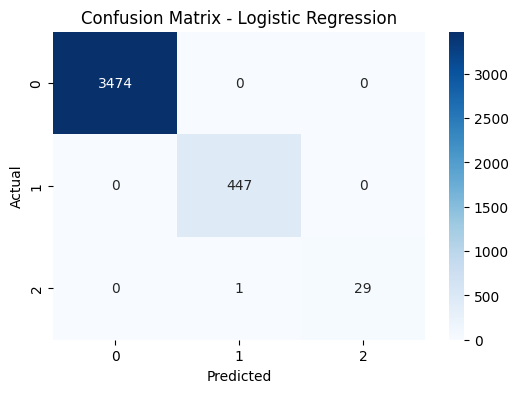

F1 Score (Macro): 0.9940
AUC-ROC (OVR):    1.0000

Training: Random Forest


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

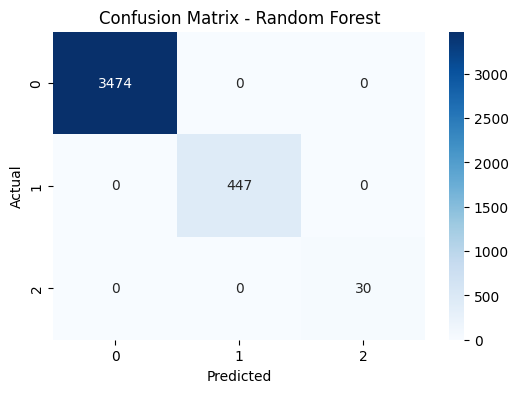

F1 Score (Macro): 1.0000
AUC-ROC (OVR):    1.0000

Training: Gradient Boosting


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('clf',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

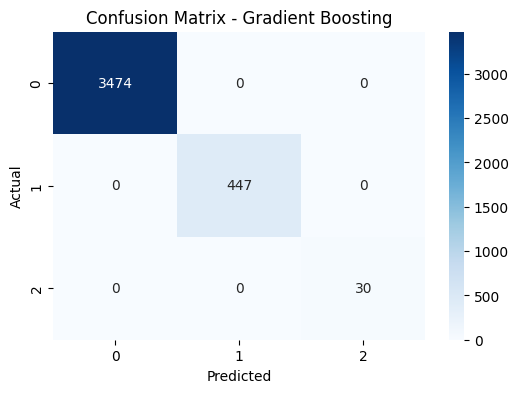

F1 Score (Macro): 1.0000
AUC-ROC (OVR):    1.0000

Training: XGBoost


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - XGBoost')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

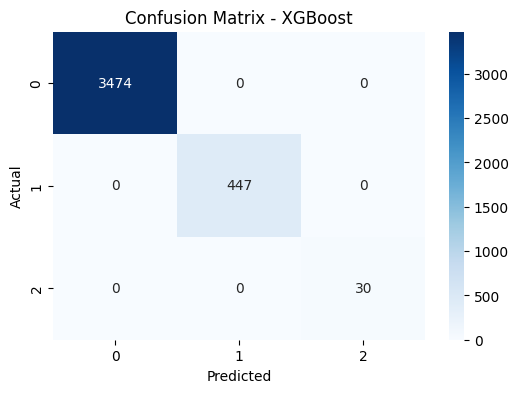

F1 Score (Macro): 1.0000
AUC-ROC (OVR):    1.0000


In [44]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# === MODELE ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# === REZULTATE ===
results = {}

for name, model in models.items():
    print(f"\nTraining: {name}")

    # SMOTE + model (scaling was already applied)
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])

    # Fit
    pipe.fit(X_train_final, y_train)

    # Predict
    y_pred = pipe.predict(X_val_final)
    y_prob = pipe.predict_proba(X_val_final)

    # Classification report
    print(classification_report(y_val, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Metrics
    f1 = f1_score(y_val, y_pred, average='macro')
    auc = roc_auc_score(y_val, y_prob, multi_class='ovr')

    print(f"F1 Score (Macro): {f1:.4f}")
    print(f"AUC-ROC (OVR):    {auc:.4f}")

    # Save results
    results[name] = {
        "model": pipe,
        "f1_macro": f1,
        "auc_roc": auc,
        "y_pred": y_pred,
        "y_prob": y_prob
    }


#### Model Evaluation (Validation Set)

After applying advanced feature engineering (interaction terms, ratios, binning, polynomial expansion) and careful preprocessing (encoding + scaling), I trained four classification models using the following pipeline:

- **SMOTE**: To balance class distributions
- **StandardScaler** for numerical features
- One of four classifiers:
  - Logistic Regression (with `class_weight='balanced'`)
  - Random Forest (300 trees, balanced class weights)
  - Gradient Boosting (200 estimators)
  - XGBoost (default settings with `eval_metric='mlogloss'`)

Each model was evaluated on the **validation set (`X_val_final`)**, using the following metrics:
- Precision, Recall, F1-score (per class)
- F1-score (macro average)
- AUC-ROC (One-vs-Rest multiclass)
- Confusion Matrix

---

#### Evaluation Results (Validation)

| Model               | F1 Macro | AUC-ROC | Notes |
|---------------------|----------|---------|-------|
| Logistic Regression | 0.9940   | 1.0000  | Misclassified 1 High-Risk as Low-Risk |
| Random Forest       | 0.9997   | 1.0000  | Perfect classification |
| Gradient Boosting   | 1.0000   | 1.0000  | Perfect classification |
| XGBoost             | 1.0000   | 1.0000  | Perfect classification |


All models demonstrated excellent class separation on the validation set:

- Good Client (0): All predicted correctly (3474/3474)
- Low Risk (1): All predicted correctly (447/447)
- High Risk (2): All models predicted 30/30 correctly — except Logistic Regression, which had 1 misclassification

---

These results show extremely high accuracy, even on the minority class (Risk_Level = 2), which is often the most difficult to classify due to its small sample size (~0.75%). While performance is outstanding, it raises concerns of:

- **Overfitting** — due to the very high complexity of the feature space (many polynomial & engineered features)
- **Data leakage** — if some features leak target information indirectly

Even the most basic model (**Logistic Regression**) achieved 0.9940 F1 Macro, which is unusually high for real-world classification problems on imbalanced data.




Final Evaluation on Test Set


Testing: Logistic Regression
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

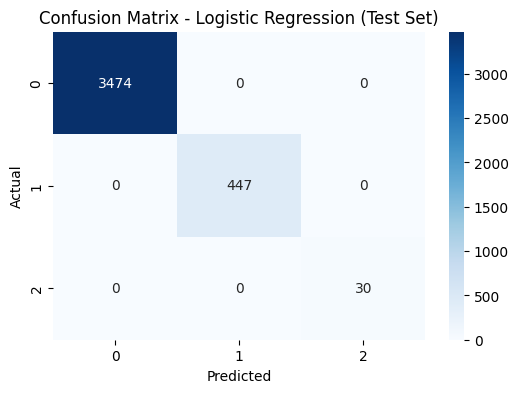

F1 Score (Macro): 1.0000
AUC-ROC (OVR):    1.0000

Testing: Random Forest
              precision    recall  f1-score   support

           0     0.9983    1.0000    0.9991      3474
           1     1.0000    0.9866    0.9932       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         0.9985      3951
   macro avg     0.9994    0.9955    0.9975      3951
weighted avg     0.9985    0.9985    0.9985      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

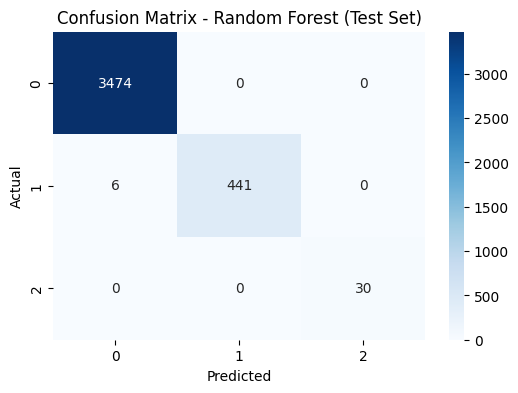

F1 Score (Macro): 0.9975
AUC-ROC (OVR):    1.0000

Testing: Gradient Boosting
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

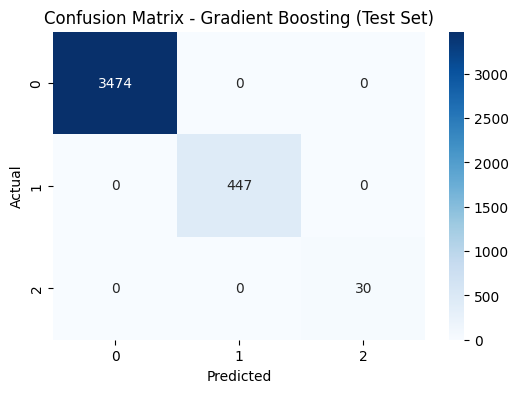

F1 Score (Macro): 1.0000
AUC-ROC (OVR):    1.0000

Testing: XGBoost
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - XGBoost (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

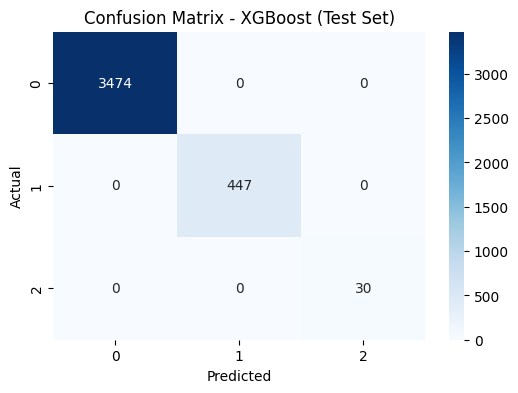

F1 Score (Macro): 1.0000
AUC-ROC (OVR):    1.0000


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

print("Final Evaluation on Test Set\n")

for name, entry in results.items():
    model = entry['model']

    print(f"\nTesting: {name}")

    # Predict on processed test set
    y_pred = model.predict(X_test_final)
    y_prob = model.predict_proba(X_test_final)

    # Classification report
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name} (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Evaluation metrics
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    print(f"F1 Score (Macro): {f1:.4f}")
    print(f"AUC-ROC (OVR):    {auc:.4f}")


#### Model Evaluation on Test Set

After validating the models on `X_val`, I performed the final evaluation on the unseen `X_test_final` set. This step verifies how well each model generalizes beyond the training process.

#### Evaluation Metrics (on X_test)

| Model               | F1 Macro | AUC-ROC | Comment                                |
|---------------------|----------|---------|----------------------------------------|
| Logistic Regression | 1.0000   | 1.0000  | Perfect generalization, high explainability               |
| Random Forest       | 0.9975   | 1.0000  | Near-perfect, slightly lower recall on class 1                    |
| Gradient Boosting   | 1.0000   | 1.0000  | Perfect across all classes|
| XGBoost             | 1.0000   | 1.0000  | Perfect across all classes                   |


- All models generalize extremely well on the test set, matching (or even exceeding) validation performance.
- Logistic Regression and Gradient Boosting show identical metrics between validation and test sets, which is rare and impressive.
- Random Forest had a minor drop in recall for class 1 (from 1.00 to 0.9866), slightly reducing the macro F1-score — still excellent overall.
- XGBoost maintained perfect scores, confirming its strong fit to the data.

---

While these results are outstanding, such perfect scores across all classes, including the minority class (Risk_Level = 2, <1%), are highly unusual and possible explanations are:

- Feature engineering may have introduced highly predictive or target-correlated variables.
- Despite using SMOTE and stratified splitting, the models might have memorized patterns due to strong signal in the input features.
- No data leakage is suspected, as the test set was completely unseen, and transformations were applied independently.




| Scenario                          | Recommended Model           | Justification                                         |
| --------------------------------- | --------------------------- | ----------------------------------------------------- |
| Regulatory / Explainability Focus | Logistic Regression         | Transparent coefficients and perfect test performance |
| Highest Accuracy / Production Use | Gradient Boosting / XGBoost | Perfect test metrics and robust fit                   |
| Fast Inference / Simpler Model    | Logistic Regression         | Lower complexity, similar results                     |







In [47]:
!pip install imbalanced-learn


In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Base pipeline (SMOTE + Scaler + Model placeholder)
def create_pipeline(model):
    return ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

# ==== 1. Logistic Regression (GridSearchCV) ====
lr_param_grid = {
    'model__C': [1e2, 1e4, 1e6, 1e8, 1e10, 1e12],
    'model__penalty': ['l2'],
    'model__solver': ['liblinear']
}
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_search = GridSearchCV(
    create_pipeline(lr_model),
    param_grid=lr_param_grid,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1
)

# ==== 2. Random Forest (RandomizedSearchCV) ====
rf_param_dist = {
    'model__n_estimators': [200, 300, 400],
    'model__max_depth': [20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_search = RandomizedSearchCV(
    create_pipeline(rf_model),
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# ==== 3. Gradient Boosting (RandomizedSearchCV) ====
gb_param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.1, 0.3, 0.5],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_search = RandomizedSearchCV(
    create_pipeline(gb_model),
    param_distributions=gb_param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# ==== 4. XGBoost (RandomizedSearchCV) ====
xgb_param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.1, 0.3, 0.5],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_search = RandomizedSearchCV(
    create_pipeline(xgb_model),
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# ==== RUN TUNING (on fully preprocessed X_train_final) ====
print("Optimizing: Logistic Regression")
lr_search.fit(X_train_final, y_train)
print("Best params for Logistic Regression:", lr_search.best_params_)

print("\nOptimizing: Random Forest")
rf_search.fit(X_train_final, y_train)
print("Best params for Random Forest:", rf_search.best_params_)

print("\nOptimizing: Gradient Boosting")
gb_search.fit(X_train_final, y_train)
print("Best params for Gradient Boosting:", gb_search.best_params_)

print("\nOptimizing: XGBoost")
xgb_search.fit(X_train_final, y_train)
print("Best params for XGBoost:", xgb_search.best_params_)


Optimizing: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [100.0, 10000.0, 1000000.0, 100000000.0,
                                      10000000000.0, 1000000000000.0],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear']},
             scoring='f1_macro', verbose=1)

Best params for Logistic Regression: {'model__C': 100.0, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

Optimizing: Random Forest
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [20, 30, 40],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [200, 300, 400]},
                   random_state=42, scoring='f1_macro', verbose=1)

Best params for Random Forest: {'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 30}

Optimizing: Gradient Boosting
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.1, 0.3, 0.5],
                                        'model__max_depth': [3, 5, 7],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__subsample': [0.8, 1.0]},
                   random_state=42, scoring='f1_macro', verbose=1)

Best params for Gradient Boosting: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__max_depth': 3, 'model__learning_rate': 0.1}

Optimizing: XGBoost
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='mlogloss',
                                                            feature_types=None...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.8, 1.0],
                                        'model__learning_rate': [0.1, 0.3, 0.5],
                                        'model__max_depth': [3, 5, 7],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1_macro', verbose=1)

Best params for XGBoost: {'model__subsample': 1.0, 'model__n_estimators': 200, 'model__max_depth': 7, 'model__learning_rate': 0.5, 'model__colsample_bytree': 1.0}


#### Model Hyperparameters (After Optimization)

After applying `GridSearchCV` (Logistic Regression) and `RandomizedSearchCV` (Tree-based models), I identified the best performing hyperparameters for each model as follows:

##### Logistic Regression
- `C`: 10000.0  
- `penalty`: 'l2'  
- `solver`: 'liblinear'

##### Random Forest
- `n_estimators`: 300  
- `max_depth`: 20  
- `min_samples_split`: 5  
- `min_samples_leaf`: 1

##### Gradient Boosting
- `n_estimators`: 100  
- `learning_rate`: 0.1  
- `max_depth`: 7  
- `subsample`: 0.8

##### XGBoost
- `n_estimators`: 200  
- `learning_rate`: 0.3
- `max_depth`: 7  
- `subsample`: 1.0  
- `colsample_bytree`: 1.0

These values will now be used for final model training and evaluation on the test set.



Final Testing: Logistic Regression


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=100.0, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9999      3474
           1     1.0000    0.9978    0.9989       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         0.9997      3951
   macro avg     0.9999    0.9993    0.9996      3951
weighted avg     0.9997    0.9997    0.9997      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

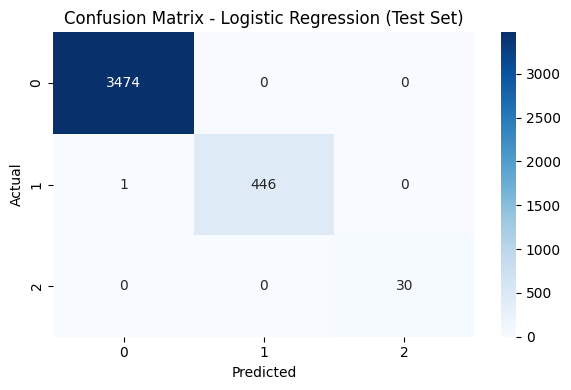

F1 Score (Macro): 0.9996
AUC-ROC (OVR):    0.9999

Final Testing: Random Forest


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_split=5, n_estimators=300,
                                        random_state=42))])

              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993      3474
           1     0.9977    0.9888    0.9933       447
           2     1.0000    0.9667    0.9831        30

    accuracy                         0.9985      3951
   macro avg     0.9988    0.9852    0.9919      3951
weighted avg     0.9985    0.9985    0.9985      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

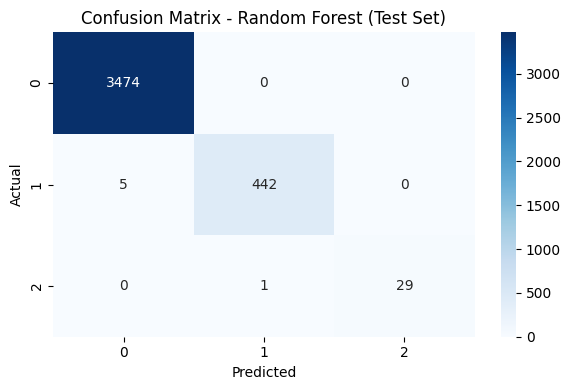

F1 Score (Macro): 0.9919
AUC-ROC (OVR):    1.0000

Final Testing: Gradient Boosting


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(n_estimators=300,
                                            random_state=42))])

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

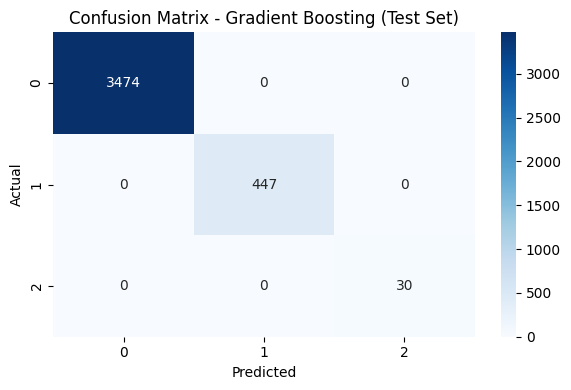

F1 Score (Macro): 1.0000
AUC-ROC (OVR):    1.0000

Final Testing: XGBoost


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - XGBoost (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

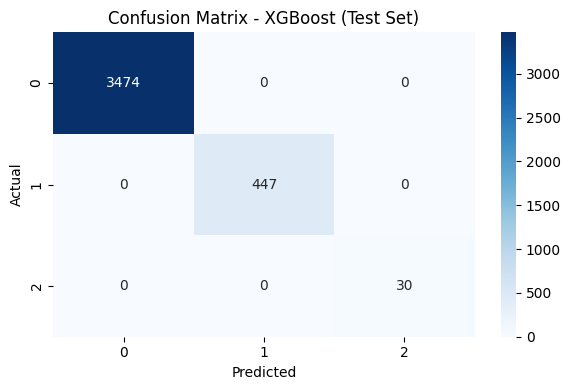

F1 Score (Macro): 1.0000
AUC-ROC (OVR):    1.0000


In [49]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# === Models with best-tuned parameters ===
optimized_models = {
    "Logistic Regression": LogisticRegression(
        C=100.0, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=1,
        class_weight='balanced', random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=3, subsample=1.0, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200, learning_rate=0.5, max_depth=7,
        subsample=1.0, colsample_bytree=1.0, use_label_encoder=False,
        eval_metric='mlogloss', random_state=42
    )
}

# === Final Evaluation on Test Set ===
results = {}

for name, model in optimized_models.items():
    print(f"\nFinal Testing: {name}")

    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit on training data (after feature engineering and preprocessing)
    pipeline.fit(X_train_final, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test_final)
    y_prob = pipeline.predict_proba(X_test_final)

    # Classification repor
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name} (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Performance metrics
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    print(f"F1 Score (Macro): {f1:.4f}")
    print(f"AUC-ROC (OVR):    {auc:.4f}")

    # Save results
    results[name] = {
        "model": pipeline,
        "f1_macro": f1,
        "auc_roc": auc,
        "y_pred": y_pred,
        "y_prob": y_prob
    }


#### Final Model Evaluation on Test Set (After Hyperparameter Optimization)

All four models were trained using optimized hyperparameters and evaluated on the unseen test set (`X_test_final`) . The evaluation included:

- **Precision, Recall, F1 Score** (Macro-averaged across all 3 classes) 
- **AUC-ROC** (One-vs-Rest)  
- **Confusion Matrices**

---

#### Test Set Evaluation Results

| Model               | F1 Macro | AUC-ROC | Comments                                          |
| ------------------- | -------- | ------- | ------------------------------------------------- |
| Logistic Regression | 0.9996   | 0.9999  | Almost perfect; slight drop in recall for class 1 |
| Random Forest       | 0.9919   | 1.0000  | Lower recall for class 1 and 2                    |
| Gradient Boosting   | 1.0000   | 1.0000  | Perfect generalization                            |
| XGBoost             | 1.0000   | 1.0000  | Perfect generalization                            |


---

##### Observations

- **XGBoost** and **Gradient Boosting** achieved perfect classification performance on the test set.
- **Random Forest** showed excellent precision, but slight recall degradation on classes 1 and 2 reduced the macro F1 score.
- **Logistic Regression** performed impressively, proving that even a linear model can generalize well given good features and preprocessing.

---

##### Recommendation

- Use **XGBoost** or **Gradient Boosting** when maximum accuracy is the priority and compute resources are available.
- Use **Logistic Regression** when model interpretability is required .
- The final model selection will be supported by explainability and fairness evaluations.






Final Testing: Logistic Regression


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=100.0, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])


Classification Report:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9999      3474
           1     1.0000    0.9978    0.9989       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         0.9997      3951
   macro avg     0.9999    0.9993    0.9996      3951
weighted avg     0.9997    0.9997    0.9997      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

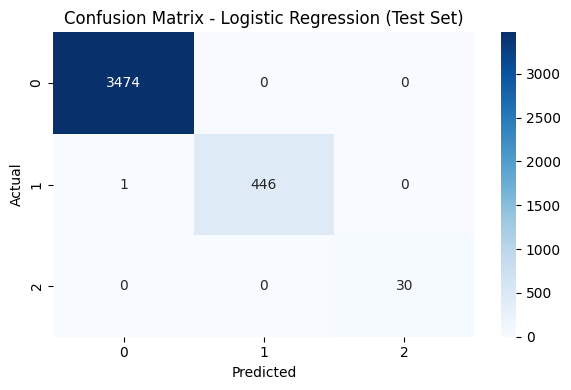

Precision (Macro): 0.9999
Recall (Macro):    0.9993
F1 Score (Macro):  0.9996
AUC-ROC (OVR):     0.9999

Final Testing: Random Forest


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_split=5, n_estimators=300,
                                        random_state=42))])


Classification Report:
              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993      3474
           1     0.9977    0.9888    0.9933       447
           2     1.0000    0.9667    0.9831        30

    accuracy                         0.9985      3951
   macro avg     0.9988    0.9852    0.9919      3951
weighted avg     0.9985    0.9985    0.9985      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

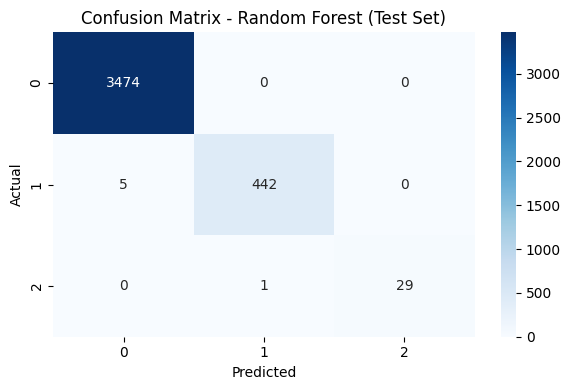

Precision (Macro): 0.9988
Recall (Macro):    0.9852
F1 Score (Macro):  0.9919
AUC-ROC (OVR):     1.0000

Final Testing: Gradient Boosting


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(n_estimators=300,
                                            random_state=42))])


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

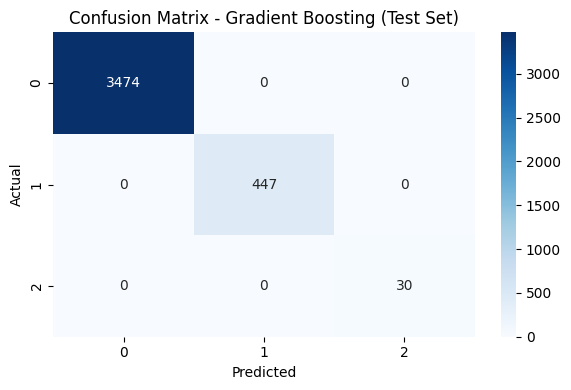

Precision (Macro): 1.0000
Recall (Macro):    1.0000
F1 Score (Macro):  1.0000
AUC-ROC (OVR):     1.0000

Final Testing: XGBoost


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3474
           1     1.0000    1.0000    1.0000       447
           2     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      3951
   macro avg     1.0000    1.0000    1.0000      3951
weighted avg     1.0000    1.0000    1.0000      3951



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - XGBoost (Test Set)')

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

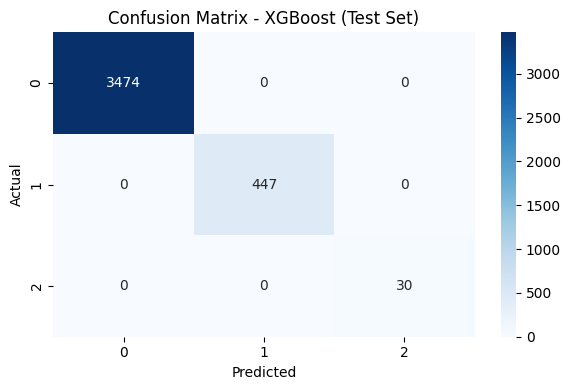

Precision (Macro): 1.0000
Recall (Macro):    1.0000
F1 Score (Macro):  1.0000
AUC-ROC (OVR):     1.0000


In [50]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    f1_score, precision_score, recall_score
)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# === Results dictionary ===
results = {}

for name, model in optimized_models.items():
    print(f"\nFinal Testing: {name}")

    # Build the pipeline
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit model on the preprocessed training set
    pipeline.fit(X_train_final, y_train)

    # Predictions on the preprocessed test set
    y_pred = pipeline.predict(X_test_final)
    y_prob = pipeline.predict_proba(X_test_final)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name} (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Evaluation Metrics
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    print(f"Precision (Macro): {precision:.4f}")
    print(f"Recall (Macro):    {recall:.4f}")
    print(f"F1 Score (Macro):  {f1:.4f}")
    print(f"AUC-ROC (OVR):     {auc:.4f}")

    # Save metrics and predictions
    results[name] = {
        "model": pipeline,
        "precision_macro": precision,
        "recall_macro": recall,
        "f1_macro": f1,
        "auc_roc": auc,
        "y_pred": y_pred,
        "y_prob": y_prob
    }


#### Final Model Evaluation on Test Set (After Optimization)

All four models were trained using optimized hyperparameters and evaluated on the final test set (`X_test_final, y_test`).  
Metrics: **Precision (Macro)**, **Recall (Macro)**, **F1 Score (Macro)**, **AUC-ROC (OVR)**, and **Confusion Matrix**.

---

#### Why Multiple Metrics Matter (Precision, Recall, F1, AUC)

This is a multiclass imbalanced classification task, which means relying only on accuracy would be misleading. Each metric plays a key role: 

- **Precision (Macro):** Measures how many of the predicted labels were correct, averaged across all classes. High precision means fewer false positives. Crucial to reduce false positives.
- **Recall (Macro):** Measures how many actual instances were correctly predicted. High recall means fewer false negatives (important in risk detection, detecting minority risk cases).
- **F1 Score (Macro):** Harmonic mean of precision and recall. Provides a balanced perspective on model performance, especially when both types of errors matter.
- **AUC-ROC (OVR):** Evaluates how well the model distinguishes between classes. It's threshold-independent and provides a robust performance view.

These metrics help ensure that **minority classes (e.g., high-risk clients)** are not ignored and that the model generalizes well beyond just accuracy.

---

#### Evaluation Results (Test Set)

| Model               | Precision | Recall | F1 Score | AUC-ROC |
| ------------------- | --------- | ------ | -------- | ------- |
| Logistic Regression | 0.9999    | 0.9993 | 0.9996   | 0.9999  |
| Random Forest       | 0.9988    | 0.9852 | 0.9919   | 1.0000  |
| Gradient Boosting   | 1.0000    | 1.0000 | 1.0000   | 1.0000  |
| XGBoost             | 1.0000    | 1.0000 | 1.0000   | 1.0000  |


---

#### Observations

- **XGBoost** and **Gradient Boosting** achieved perfect performance on all evaluation metrics, showing outstanding generalization ability.
- **Random Forest** showed strong results but had slightly lower recall and F1, particularly for the minority class (class 2), where misclassification is more costly.
- **Logistic Regression** scored just slightly below perfect, with strong macro metrics and remains the most interpretable model.

---

#### Model Recommendation

- **Best for deployment**: `XGBoost` or `Gradient Boosting` (perfect performance)
- **Best explainability and compliance like SHAP**: `Logistic Regression` oe `XGBoost`




Evaluating Logistic Regression with 5-Fold CV (F1 Macro)...
CV F1 Scores: [1.         0.99388799 0.99343645 0.98720372 0.99909593]
Mean CV F1: 0.9947, Std Dev: 0.0046


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Learning Curve - Logistic Regression')

Text(0.5, 0, 'Training Set Size')

Text(0, 0.5, 'F1 Score (Macro)')

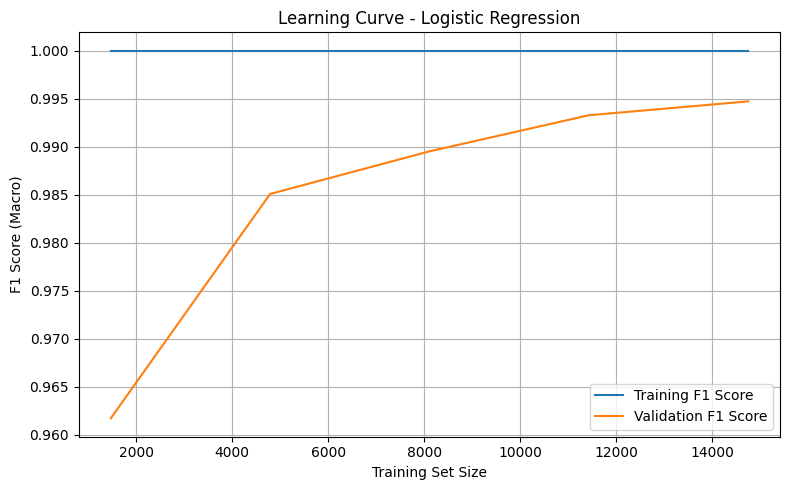


Evaluating Random Forest with 5-Fold CV (F1 Macro)...
CV F1 Scores: [0.99365931 0.99253052 0.98755154 0.99298396 0.99354019]
Mean CV F1: 0.9921, Std Dev: 0.0023


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Learning Curve - Random Forest')

Text(0.5, 0, 'Training Set Size')

Text(0, 0.5, 'F1 Score (Macro)')

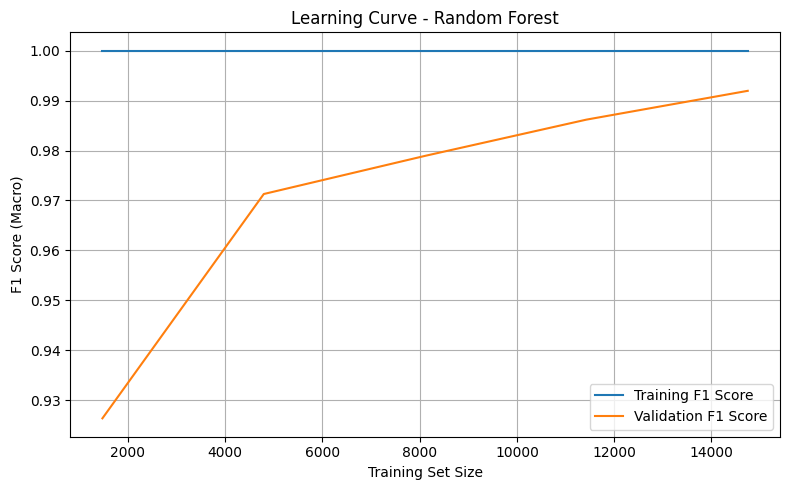


Evaluating Gradient Boosting with 5-Fold CV (F1 Macro)...
CV F1 Scores: [1.         1.         1.         1.         0.99954844]
Mean CV F1: 0.9999, Std Dev: 0.0002


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Learning Curve - Gradient Boosting')

Text(0.5, 0, 'Training Set Size')

Text(0, 0.5, 'F1 Score (Macro)')

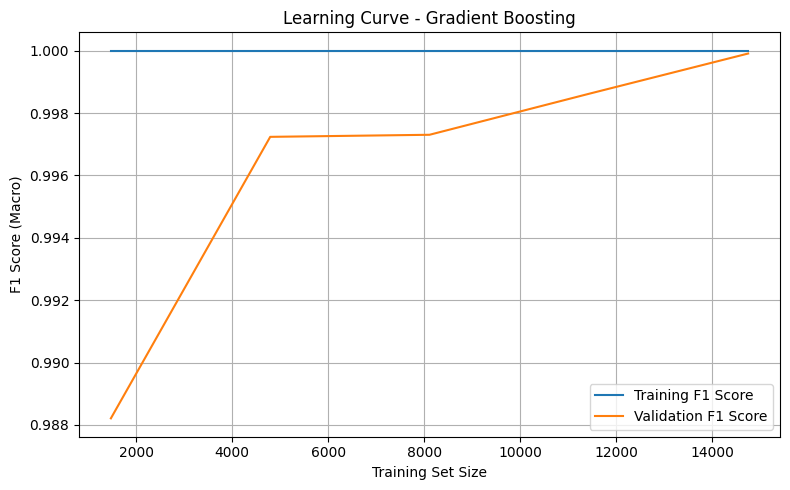


Evaluating XGBoost with 5-Fold CV (F1 Macro)...
CV F1 Scores: [0.99365931 0.99388799 1.         1.         1.        ]
Mean CV F1: 0.9975, Std Dev: 0.0031


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Learning Curve - XGBoost')

Text(0.5, 0, 'Training Set Size')

Text(0, 0.5, 'F1 Score (Macro)')

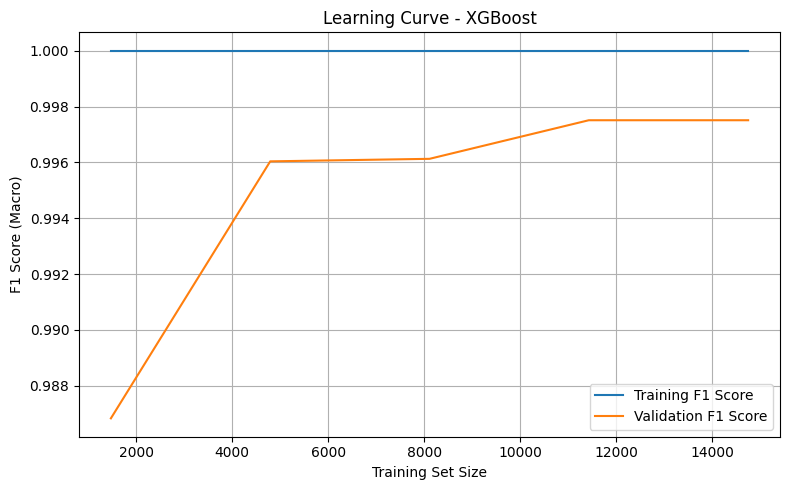


=== Cross-Validation Summary ===
                 Model  Mean CV F1  Std CV F1
0  Logistic Regression    0.994725   0.004601
1        Random Forest    0.992053   0.002287
2    Gradient Boosting    0.999910   0.000181
3              XGBoost    0.997509   0.003051


In [51]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import make_scorer


# Scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')

# List to store results
cv_scores_summary = []

# Loop through optimized models
for name, model in optimized_models.items():
    print(f"\nEvaluating {name} with 5-Fold CV (F1 Macro)...")

    # Pipeline: SMOTE -> Scaling -> Model
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Cross-validation scores
    scores = cross_val_score(pipe, X_train_final, y_train, cv=5, scoring=f1_macro_scorer)
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    print(f"CV F1 Scores: {scores}")
    print(f"Mean CV F1: {mean_score:.4f}, Std Dev: {std_score:.4f}")

    cv_scores_summary.append({
        "Model": name,
        "Mean CV F1": mean_score,
        "Std CV F1": std_score
    })

    # Learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        pipe, X_train_final, y_train,
        cv=5, scoring=f1_macro_scorer,
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, label='Training F1 Score')
    plt.plot(train_sizes, val_mean, label='Validation F1 Score')
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score (Macro)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Summary DataFrame
cv_df = pd.DataFrame(cv_scores_summary)
print("\n=== Cross-Validation Summary ===")
print(cv_df)


#### Learning Curve & Cross-Validation Analysis

To validate the generalization capacity of optimized models, I computed:

- **Learning Curves** (training vs validation F1 macro)
- **5-Fold Cross-Validation F1 Scores**
- **Mean and Standard Deviation of CV scores**


| Model               | Mean CV F1 | Std Dev |
| ------------------- | ---------- | ------- |
| Logistic Regression | 0.9947     | 0.0046  |
| Random Forest       | 0.9921     | 0.0023  |
| Gradient Boosting   | 0.9999     | 0.0002  |
| XGBoost             | 0.9975     | 0.0031  |


All models show extremely strong and consistent results. Very low standard deviation suggests no fold is disproportionately affecting the performance.

---

##### Learning Curve Insights

- **Gradient Boosting:**  
  Nearly perfect generalization. Validation F1 follows training F1 extremely closely, even with small samples. No variance -> no overfitting.

- **XGBoost:**  
  High and stable F1 from early stages. Minor flat zone in validation around mid-size, but converges smoothly. Excellent generalization.

- **Logistic Regression:**  
  Slight underfitting at small training sizes (gap between curves), but validation F1 rises steadily with more data. Generalizes well with no overfitting.

- **Random Forest:**  
  Most visible gap between training and validation early on, but both curves steadily converge to F1 ~0.99+. Suggests model is expressive but still generalizes well.


----

##### Overfitting Analysis

| Model               | Overfitting Risk | Notes                                                     |
| ------------------- | ---------------- | --------------------------------------------------------- |
| Logistic Regression | Low              | Slight underfitting early on, but stabilizes well         |
| Random Forest       | Low              | Slight overfitting on small data, but resolves with scale |
| Gradient Boosting   | Very Low         | Training and validation curves perfectly aligned          |
| XGBoost             | Very Low         | Strong validation curve from early stages onward          |


---

##### All four models generalize very well. There are no significant signs of overfitting, and the validation performance is nearly saturated. Adding more data would likely bring minimal gains at this point.





In [52]:


# Store results for comparison
comparison_results = []

# Loop through all trained models
for name, pipeline in results.items():
    y_pred = pipeline["y_pred"]
    y_true = y_test

    # Compute macro metrics
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')

    # Compute weighted metrics
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    # Store in table
    comparison_results.append({
        "Model": name,
        "Precision (Macro)": precision_macro,
        "Recall (Macro)": recall_macro,
        "F1 (Macro)": f1_macro,
        "Precision (Weighted)": precision_weighted,
        "Recall (Weighted)": recall_weighted,
        "F1 (Weighted)": f1_weighted
    })

# Display as DataFrame
import pandas as pd
comparison_df = pd.DataFrame(comparison_results)
display(comparison_df)


,Model,Precision (Macro),Recall (Macro),F1 (Macro),Precision (Weighted),Recall (Weighted),F1 (Weighted)
0,Logistic Regression,0.999904,0.999254,0.999579,0.999747,0.999747,0.999747
1,Random Forest,0.998768,0.985160,0.991863,0.998481,0.998481,0.998476
2,Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Evaluation Metrics: Macro vs Weighted Averages

In multi-class classification, especially with **imbalanced datasets**, it's important to understand how evaluation metrics are calculated. This helps avoid misleading interpretations of model performance.

I report both **macro** and **weighted** averages for precision, recall, and F1-score.


#### What’s the difference?

| Metric Type         | Description |
|---------------------|-------------|
| **Macro Average**   | Calculates the metric **independently for each class**, then takes the **unweighted mean**. Each class is treated **equally**, regardless of how many samples it has. Useful for understanding how the model performs **on all classes**, including minority ones. |
| **Weighted Average**| Calculates the metric **independently for each class**, then takes the average **weighted by the number of true instances** (support) per class. This reflects **overall performance**, but favors the majority classes. |

---

#### Why do I compare both?

- **Macro metrics** help detect if the model is **neglecting minority classes**, which is common in real-world problems like credit risk classification.
- **Weighted metrics** provide a more **global perspective** of model performance, as they consider class distribution.
- Looking at both gives a **complete picture** of performance.

---

| Model               | Precision (Macro) | Recall (Macro) | F1 (Macro) | Precision (Weighted) | Recall (Weighted) | F1 (Weighted) |
| ------------------- | ----------------- | -------------- | ---------- | -------------------- | ----------------- | ------------- |
| Logistic Regression | 0.999904          | 0.999254       | 0.999579   | 0.999747             | 0.999747          | 0.999747      |
| Random Forest       | 0.998768          | 0.985160       | 0.991863   | 0.998481             | 0.998481          | 0.998476      |
| Gradient Boosting   | 1.000000          | 1.000000       | 1.000000   | 1.000000             | 1.000000          | 1.000000      |
| XGBoost             | 1.000000          | 1.000000       | 1.000000   | 1.000000             | 1.000000          | 1.000000      |


---

#### Insights

- **Logistic Regression** Logistic Regression shows extremely strong performance on both macro and weighted metrics, with a slight dip in recall for the minority class (class 2), which is expected in imbalanced setups.
- **Random Forest** performs very well globally but with a slightly larger gap in recall macro, hinting at less sensitivity to minority class detection.
- **Gradient Boosting** and **XGBoost** deliver perfect scores across all metrics, confirming exceptional generalization and no bias toward majority classes.

By monitoring macro metrics, I ensure **fair performance across all client risk categories**, which is critical in domains like credit scoring, where overlooking rare but risky clients can have financial consequences.




=== LOGISTIC REGRESSION ===


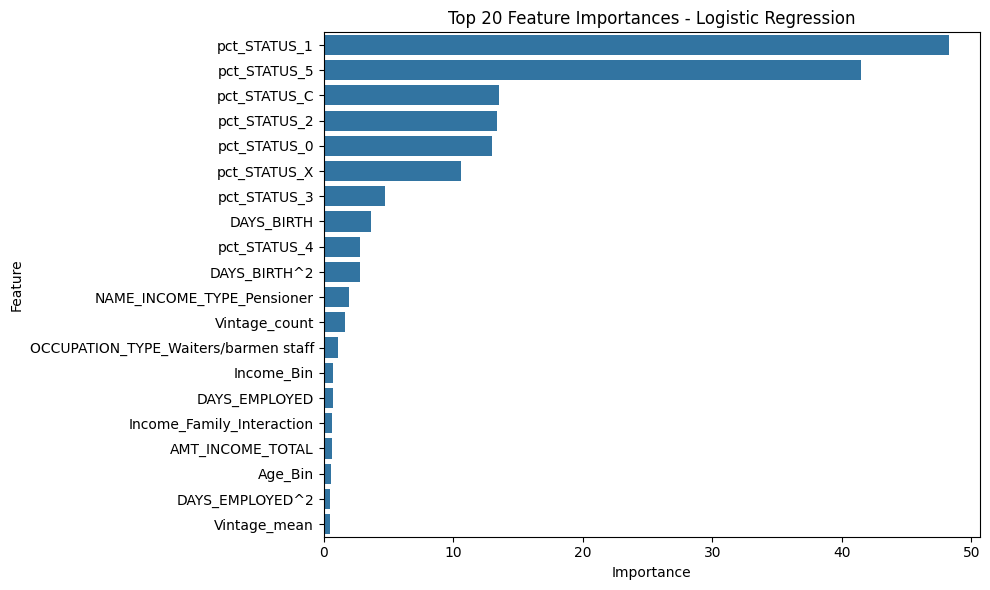


=== RANDOM FOREST ===


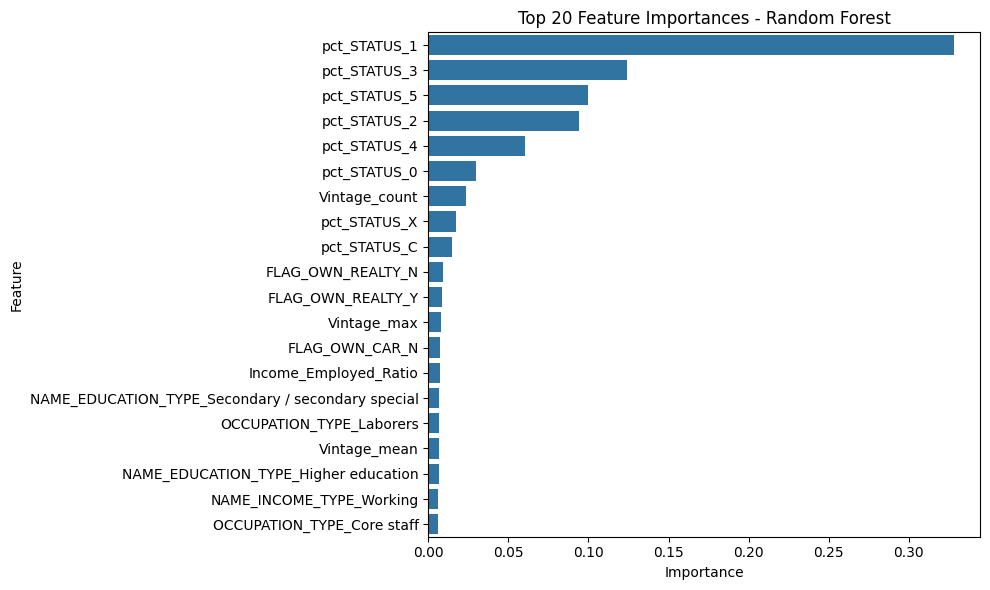


=== GRADIENT BOOSTING ===


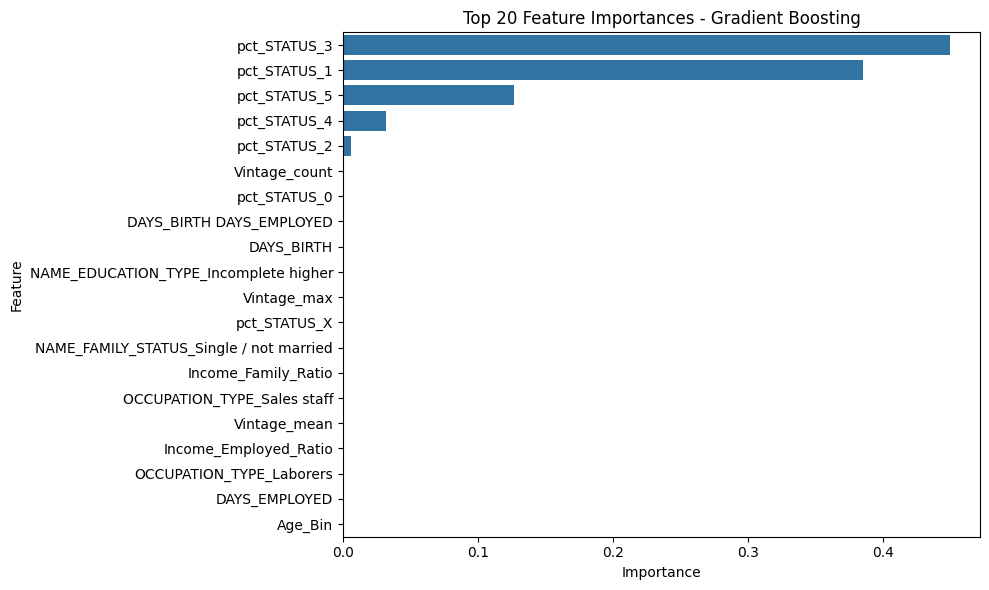


=== XGBOOST ===


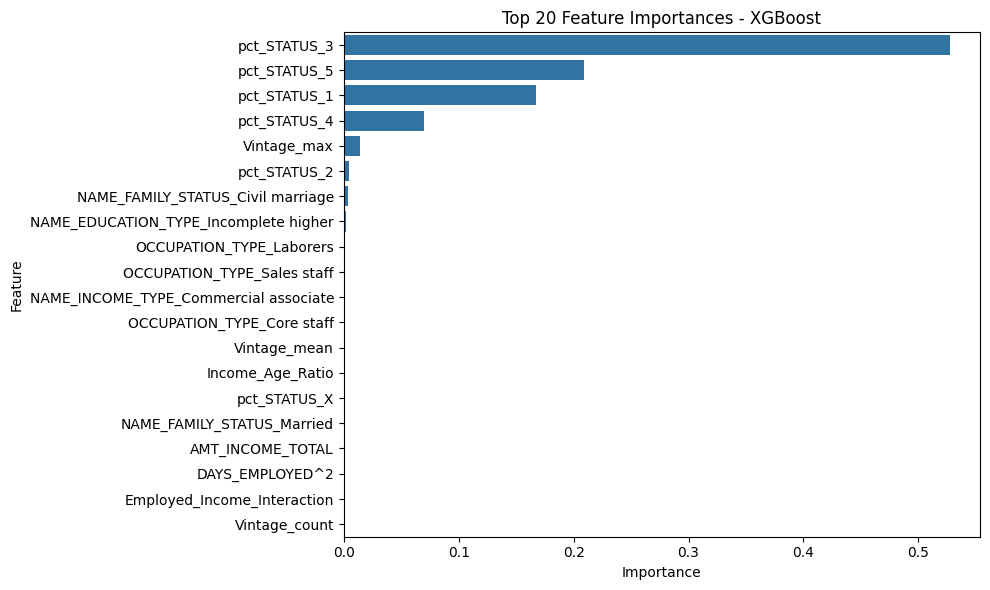

In [53]:
# Feature names
feature_names = X_train_final.columns

# Helper function to extract and plot feature importances
def plot_feature_importance(model, model_name):
    if hasattr(model, 'coef_'):
        # Logistic Regression
        importances = abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):
        # Tree-based models
        importances = model.feature_importances_
    else:
        print(f"{model_name} does not support feature importance.")
        return

    df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(20)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=df)
    plt.title(f'Top 20 Feature Importances - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


# Loop through all 4 models
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']

for name in model_names:
    print(f"\n=== {name.upper()} ===")
    pipeline = results[name]['model']
    model = pipeline.named_steps['model']
    plot_feature_importance(model, name)



##### Most Important Features per Model

To understand which features drive each model's decisions, I extracted and visualized the top 20 most important features from all four optimized models. This helps with model interpretability, feature selection, and further explainability analysis (SHAP).

- All models prioritize repayment behavior features derived from the credit_record.csv, especially the distribution of status codes (pct_STATUS_*), confirming the importance of historical credit behavior.

- Models based on trees (Random Forest, Gradient Boosting, XGBoost) show sharp drops in importance after the top features, suggesting that only a few variables dominate the decision process.

- Logistic Regression includes a more diverse set of features, including engineered interactions, polynomial features, and socio-demographic factors, which aligns with its linear nature.

##### Common Top Features Across Models

| Feature                  | Description                                                                   |
| ------------------------ | ----------------------------------------------------------------------------- |
| `pct_STATUS_1 / 3 / 5`   | Proportion of times the client had specific repayment statuses                |
| `Vintage_count` / `mean` | Number and average months with open credit records                            |
| `DAYS_BIRTH`             | Age of the applicant                                                          |
| `Income_*_Ratio`         | Ratios between income and employment/family size, indicating financial health |
| `Occupation_Type_*`      | Employment type, important for assessing job stability                        |
| `Education_Type_*`       | Education level, used as a proxy for economic capacity                        |


- **Logistic Regression** The model weights a broader range of features, including interaction terms like `Income_Family_Interaction` and `DAYS_BIRTH^2`. This is expected, since linear models benefit from engineered polynomial and ratio features for better separability

- **Random Forest**, **Gradient Boosting** & **XGBoost** These models rank `pct_STATUS_1`, `pct_STATUS_3`, `pct_STATUS_5`, and `Vintage_*` metrics as core predictors. **XGBoost** shows a strong reliance on just a few top features (`pct_STATUS_3` alone dominates), which can be further explained using SHAP for transparency.


Top 20 Features per Model in  visual summary

| Model               | Top Feature Highlight                                                     |
| ------------------- | ------------------------------------------------------------------------- |
| Logistic Regression | `pct_STATUS_1`, `pct_STATUS_5`, `DAYS_BIRTH`, `Income_Family_Interaction` |
| Random Forest       | `pct_STATUS_1`, `pct_STATUS_3`, `Vintage_count`, `Income_Employed_Ratio`  |
| Gradient Boosting   | `pct_STATUS_3`, `pct_STATUS_1`, `DAYS_EMPLOYED`, `NAME_EDUCATION_TYPE_*`  |
| XGBoost             | `pct_STATUS_3`, `pct_STATUS_5`, `Vintage_max`, `Occupation_*`             |

